# DS 7331 Data Mining: Lab 3 iPython Notebook
### Created On: March 29, 2019
## Authors:  
- Arora, Tanvi                
- Chandna, Rajat
- Henderson Kuns, Nicol
- Ramasundaram, Kumar
- Vasquez, James

## Table of Contents
- Business Understanding
- Import Modules
- Load Data

# Business Understanding 

Lots of verbiage goes here....Space is awesome pulsars are probably cool too

### Data Meaning Type
- **mean_intg** - Mean of the integrated profile.
- **sd_intg** - Standard deviation of the integrated profile. 
- **exc_kurt_intg** - Excess kurtosis of the integrated profile. 
- **skw_intg** - Skewness of the integrated profile. 
- **mean_dmsnr** - Mean of the DM-SNR curve.                               
- **sd_dmsnr** - Standard deviation of the DM-SNR curve. 
- **exc_kurt_dmsnr** - Excess kurtosis of the DM-SNR curve. 
- **skw_dmsnr** - Skewness of the DM-SNR curve. 
- **class** - class

### Import Modules

In [1]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

### Load Data

In [2]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/HTRU_2.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0

102.5078125,58.88243001,0.465318154,-0.515087909,1.677257525,14.86014572,10.57648674,127.3935796,0

103.015625,39.34164944,0.323328365,1.051164429,3.121237458,21.74466875,7.735822015,63.17190911,0

136.75,57.17844874,-0.068414638,-0.636238369,3.642976589,20.9592803,6.89649891,53.59366067,0

88.7265625,40.67222541,0.600866079,1.123491692,1.178929766,11.4687196,14.26957284,252.5673058,0



In [3]:
# Import the colon delimited data file into pandas dataFrame
pulsars_Df = pd.read_csv(pathOfDataFile, sep = ",", names= ["mean_intg", "sd_intg", "exc_kurt_intg", "skw_intg", "mean_dmsnr", \
                                      "sd_dmsnr", "exc_kurt_dmsnr", "skw_dmsnr", "class"])

pulsars_Df.head(7)

mean_intg    sd_intg  exc_kurt_intg  skw_intg  mean_dmsnr   sd_dmsnr  \
0  140.562500  55.683782      -0.234571 -0.699648    3.199833  19.110426   
1  102.507812  58.882430       0.465318 -0.515088    1.677258  14.860146   
2  103.015625  39.341649       0.323328  1.051164    3.121237  21.744669   
3  136.750000  57.178449      -0.068415 -0.636238    3.642977  20.959280   
4   88.726562  40.672225       0.600866  1.123492    1.178930  11.468720   
5   93.570312  46.698114       0.531905  0.416721    1.636288  14.545074   
6  119.484375  48.765059       0.031460 -0.112168    0.999164   9.279612   

   exc_kurt_dmsnr   skw_dmsnr  class  
0        7.975532   74.242225      0  
1       10.576487  127.393580      0  
2        7.735822   63.171909      0  
3        6.896499   53.593661      0  
4       14.269573  252.567306      0  
5       10.621748  131.394004      0  
6       19.206230  479.756567      0

# Data Quality

In [4]:
pulsars_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_intg         17898 non-null float64
sd_intg           17898 non-null float64
exc_kurt_intg     17898 non-null float64
skw_intg          17898 non-null float64
mean_dmsnr        17898 non-null float64
sd_dmsnr          17898 non-null float64
exc_kurt_dmsnr    17898 non-null float64
skw_dmsnr         17898 non-null float64
class             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "float64" and column containing class variable, a categorical variable is encoded in type "int64", in which value "0" means "No" - "Star is Not a pulsar" and "1" means "Yes" - "Star is a pulsar"

dtypes: float64(8), int64(1)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [5]:
# To find any missing values
pulsars_Df.isnull().any()

mean_intg         False
sd_intg           False
exc_kurt_intg     False
skw_intg          False
mean_dmsnr        False
sd_dmsnr          False
exc_kurt_dmsnr    False
skw_dmsnr         False
class             False
dtype: bool

**There are no missing values for any observations/rows in our data set.**

In [6]:
# To find duplicated rows in data Frame
pulsars_Df.duplicated().any()

False

**There are no duplicate values for any observations/rows in our data set.**

In [7]:
pulsars_Df.describe()

mean_intg       sd_intg  exc_kurt_intg      skw_intg    mean_dmsnr  \
count  17898.000000  17898.000000   17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532       0.477857      1.770279     12.614400   
std       25.652935      6.843189       1.064040      6.167913     29.472897   
min        5.812500     24.772042      -1.876011     -1.791886      0.213211   
25%      100.929688     42.376018       0.027098     -0.188572      1.923077   
50%      115.078125     46.947479       0.223240      0.198710      2.801839   
75%      127.085938     51.023202       0.473325      0.927783      5.464256   
max      192.617188     98.778911       8.069522     68.101622    223.392140   

           sd_dmsnr  exc_kurt_dmsnr     skw_dmsnr         class  
count  17898.000000    17898.000000  17898.000000  17898.000000  
mean      26.326515        8.303556    104.857709      0.091574  
std       19.470572        4.506092    106.514540      0.288432  
min        7.370432       -3.139270     -1.976976      0.000000  
25%       14.437332        5.781506     34.960504      0.000000  
50%       18.461316        8.433515     83.064556      0.000000  
75%       28.428104       10.702959    139.309331      0.000000  
max      110.642211       34.539844   1191.000837      1.000000

## Outlier Analysis

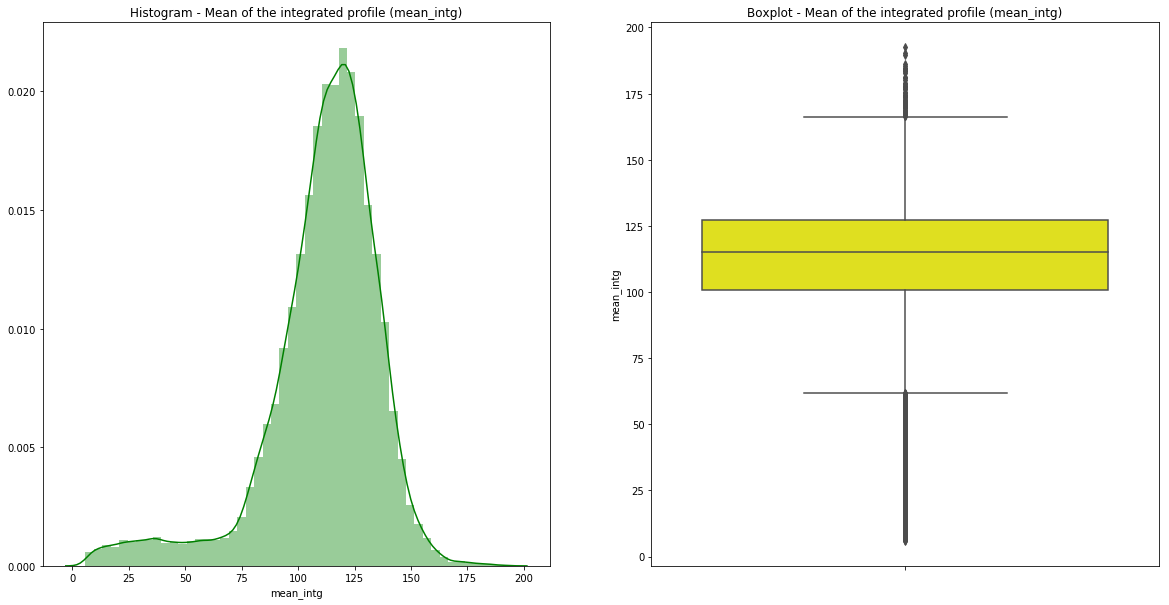

In [8]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Mean of the integrated profile (mean_intg)")
sns.distplot(pulsars_Df['mean_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the integrated profile (mean_intg)")
sns.boxplot(x = 'mean_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

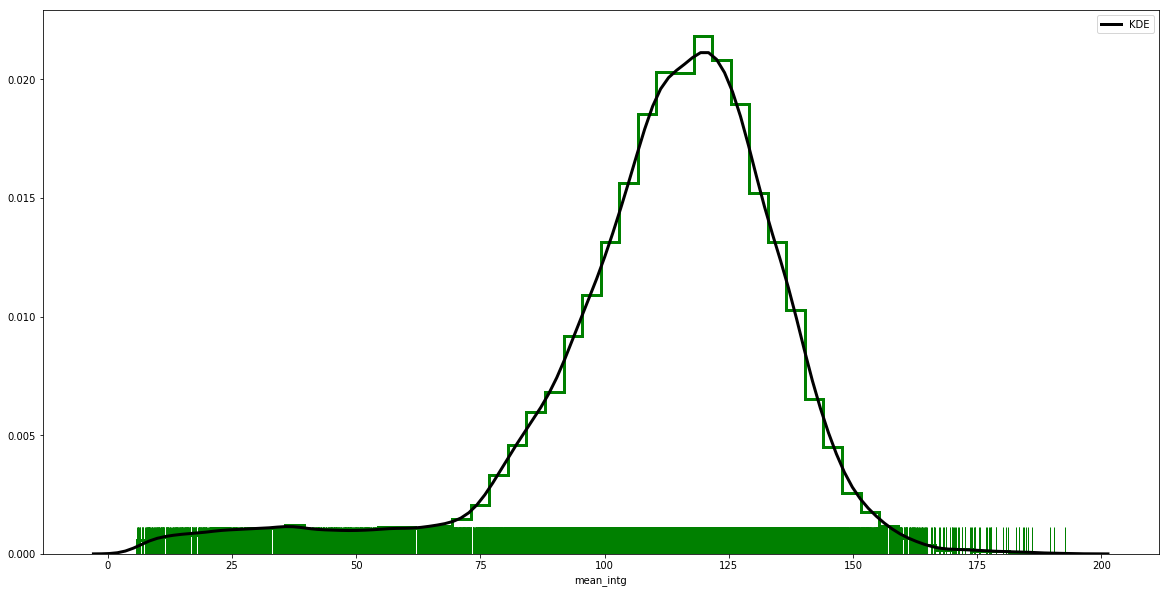

In [9]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['mean_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [10]:
# Check how many values of mean_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['mean_intg']) - (3 * np.std(pulsars_Df['mean_intg']))
b = np.mean(pulsars_Df['mean_intg']) + (3 * np.std(pulsars_Df['mean_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_intg'] > b]['class'].count())

Number of values under 3 Std. = 451
Number of values above 3 Std. = 3


In [11]:
c = pulsars_Df[pulsars_Df['mean_intg'] < a]['class'].count()
d = sum(pulsars_Df[pulsars_Df['mean_intg'] < a]['class'])
print("Percentage of values of class 0 under 3 Std. of mean_intg Variable = %s" %((c - d)/c))
print("Percentage of values of class 1 under 3 Std. of mean_intg Variable = %s" %((d)/c))

Percentage of values of class 0 under 3 Std. of mean_intg Variable = 0.008869179600886918
Percentage of values of class 1 under 3 Std. of mean_intg Variable = 0.991130820399113


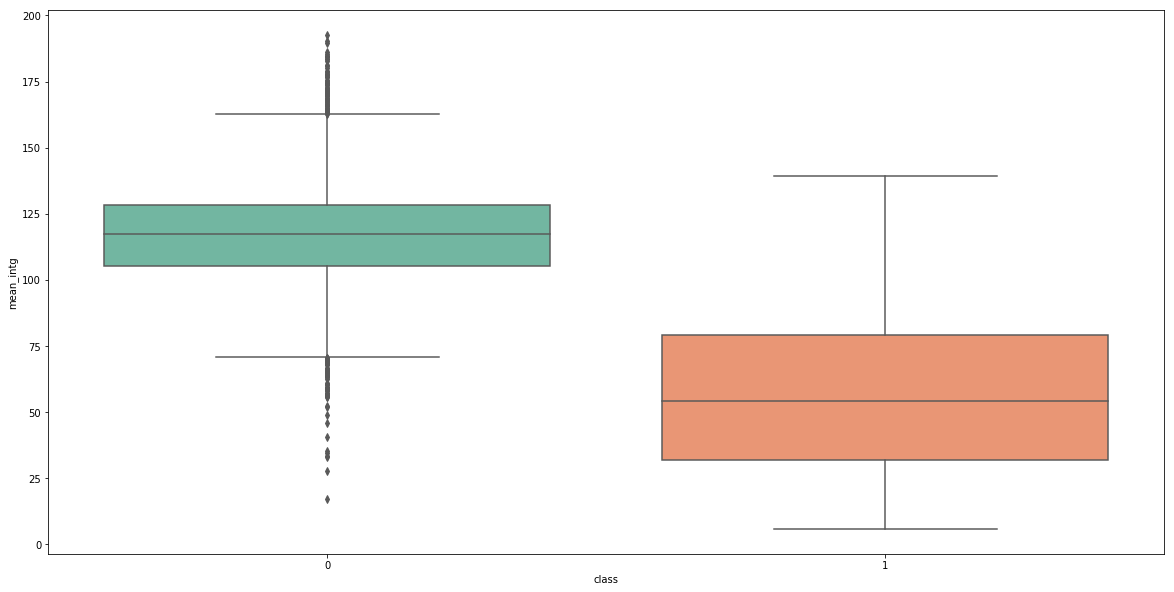

In [12]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'mean_intg', data=pulsars_Df)
plt.show()

In [13]:
# Values of mean_intg variable over 3 std of mean
pulsars_Df[pulsars_Df['mean_intg'] > b]

mean_intg    sd_intg  exc_kurt_intg  skw_intg  mean_dmsnr   sd_dmsnr  \
4548   190.421875  59.106447      -1.517159  1.497580   95.719900  97.754509   
6564   189.734375  59.578268      -1.641515  1.868564  147.019231  76.999786   
15687  192.617188  56.926093      -1.876011  2.444698   20.024247  53.103249   

       exc_kurt_dmsnr  skw_dmsnr  class  
4548         0.058366  -1.964998      0  
6564        -0.898056  -0.649195      0  
15687        2.764809   6.341108      0

-- Var 1 Ends --

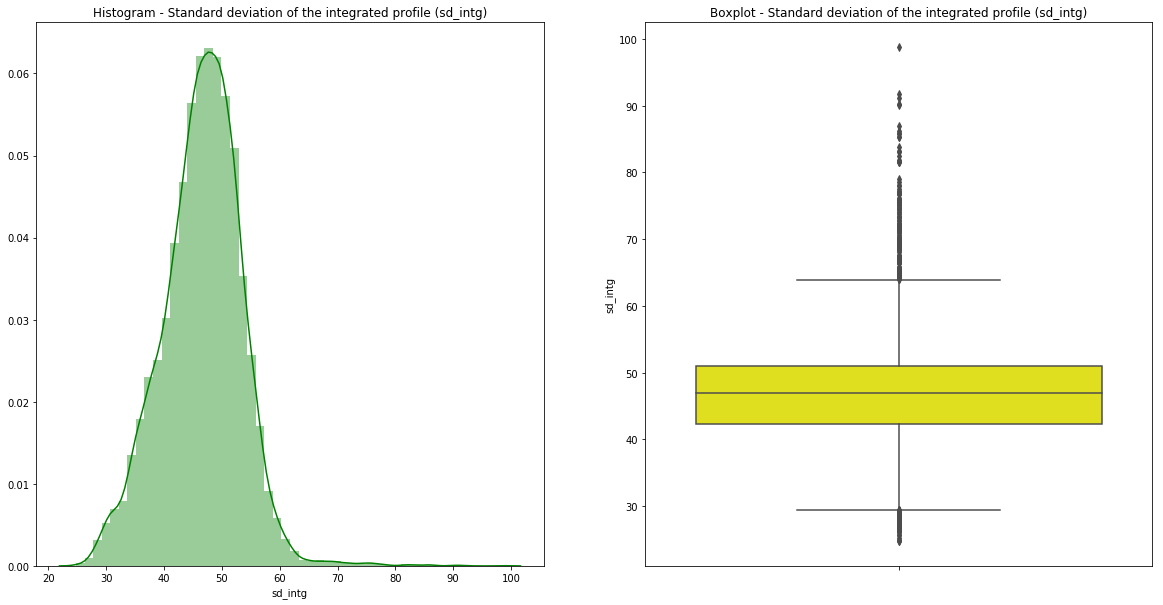

In [14]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Standard deviation of the integrated profile (sd_intg)")
sns.distplot(pulsars_Df['sd_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Standard deviation of the integrated profile (sd_intg)")
sns.boxplot(x = 'sd_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

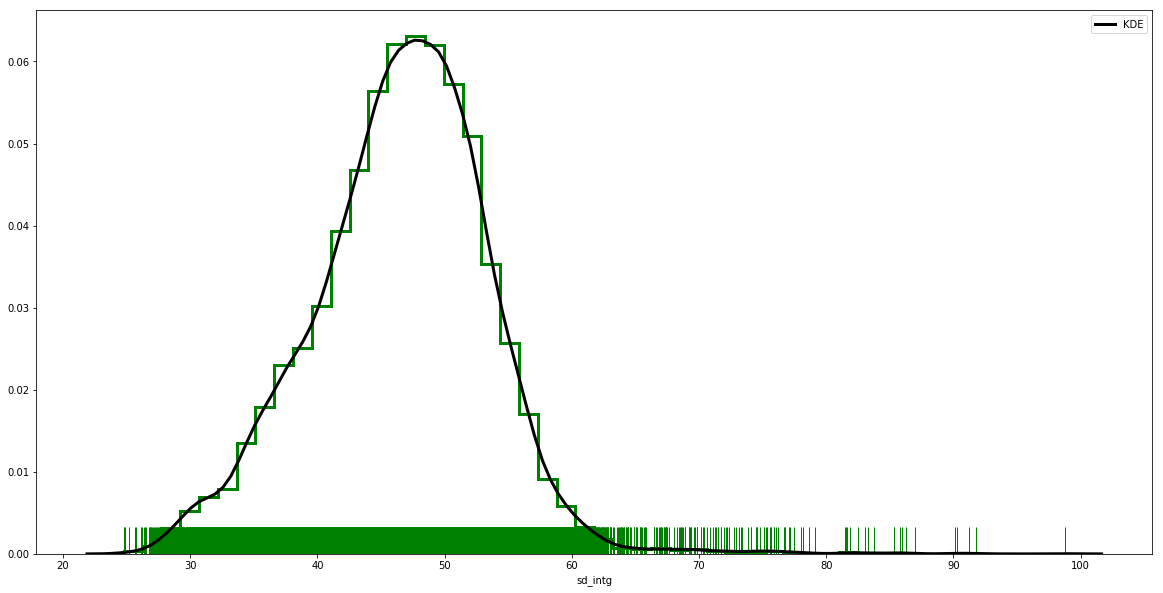

In [15]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['sd_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [16]:
# Check how many values of sd_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['sd_intg']) - (3 * np.std(pulsars_Df['sd_intg']))
b = np.mean(pulsars_Df['sd_intg']) + (3 * np.std(pulsars_Df['sd_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_intg'] > b]['class'].count())

Number of values under 3 Std. = 6
Number of values above 3 Std. = 99


In [17]:
# Taking random 20 obs over 3 std for manual inspection
pulsars_Df[pulsars_Df['sd_intg'] > b].head(20)

mean_intg    sd_intg  exc_kurt_intg  skw_intg  mean_dmsnr   sd_dmsnr  \
370   107.539062  86.951396      -0.008928 -1.676724  211.948997  54.010310   
525   119.367188  71.516046       0.061737 -1.383625    0.886288   9.267690   
544   120.539062  71.487313       0.066583 -1.237876    1.568562  15.701101   
758    59.351562  76.784458       1.536309  0.736696    0.636288  10.566986   
893   136.828125  67.336504      -0.257778 -1.276375    0.962375   8.426909   
961   162.039062  67.439371      -0.911776 -0.229593    0.807692  10.852915   
1124  118.984375  77.139786       0.173310 -1.501641    0.836957  11.997185   
1233  144.945312  70.872388      -0.359561 -1.011004    7.689799  37.922381   
1235  130.406250  72.400949      -0.020930 -1.267204    5.086957  27.146896   
1236   74.632812  75.867161       0.834880 -0.838742   67.623746  81.199889   
1666  109.039062  81.853089       0.346044 -1.339971    4.505853  29.640614   
1673  107.554688  75.139434       0.526715 -1.286904   87.088629  91.049357   
1677  111.218750  71.325173       0.333783 -1.215763    1.031773  12.953764   
2004  129.375000  70.379995      -0.004722 -1.239225   13.843645  39.058632   
2018   71.984375  79.084407       1.086365 -0.535666  176.015050  60.662340   
2137  135.859375  81.503042       0.023921 -1.791886    3.655518  19.638924   
2558  103.351562  71.262783       0.515849 -1.000507   17.805184  50.209141   
2579  139.375000  69.674691      -0.138304 -0.972711    5.885452  29.832774   
2876   99.281250  71.956469       0.765558 -0.827640  197.234114  63.758798   
2953   66.796875  67.402865       1.134214  0.007024    1.111204  13.058532   

      exc_kurt_dmsnr   skw_dmsnr  class  
370        -2.556795    5.768458      0  
525        19.865582  493.538840      0  
544        11.669448  146.713841      0  
758        21.017232  466.135457      0  
893        23.742638  691.196174      0  
961        21.274814  483.251270      0  
1124       17.941527  340.366461      0  
1233        5.006665   24.171402      0  
1235        6.109138   38.936796      0  
1236        0.998825   -0.311267      0  
1666        7.469904   56.149667      0  
1673        0.467833   -1.357949      0  
1677       15.971510  277.369560      0  
2004        3.180326   10.384730      0  
2018       -1.081765    0.377426      1  
2137        7.228962   63.401192      0  
2558        2.773783    6.446037      0  
2579        5.730760   34.036690      0  
2876       -1.876388    2.431297      0  
2953       13.967321  217.194927      0

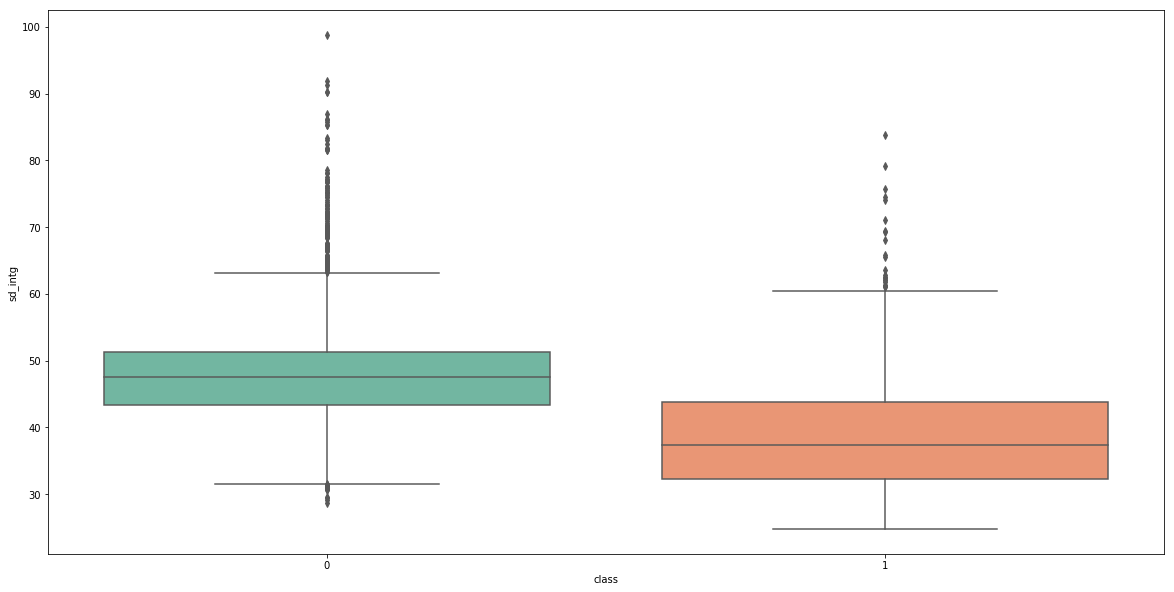

In [18]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'sd_intg', data=pulsars_Df)
plt.show()

--Var 2 Ends -- 

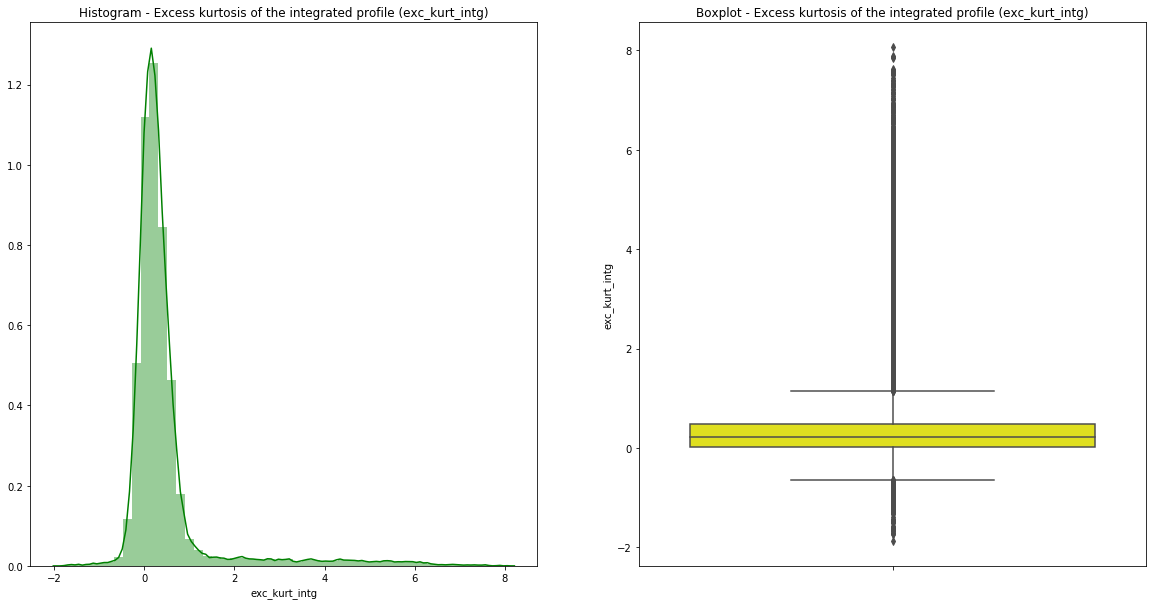

In [19]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Excess kurtosis of the integrated profile (exc_kurt_intg)")
sns.distplot(pulsars_Df['exc_kurt_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Excess kurtosis of the integrated profile (exc_kurt_intg)")
sns.boxplot(x = 'exc_kurt_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

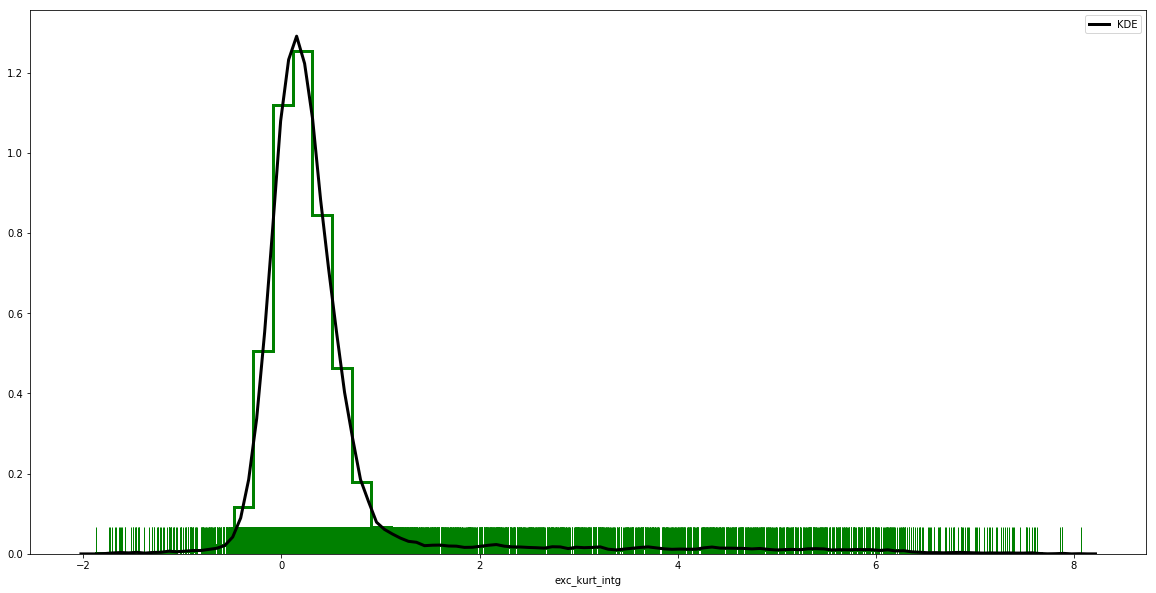

In [20]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['exc_kurt_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [21]:
# Check how many values of exc_kurt_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['exc_kurt_intg']) - (3 * np.std(pulsars_Df['exc_kurt_intg']))
b = np.mean(pulsars_Df['exc_kurt_intg']) + (3 * np.std(pulsars_Df['exc_kurt_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['exc_kurt_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['exc_kurt_intg'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 636


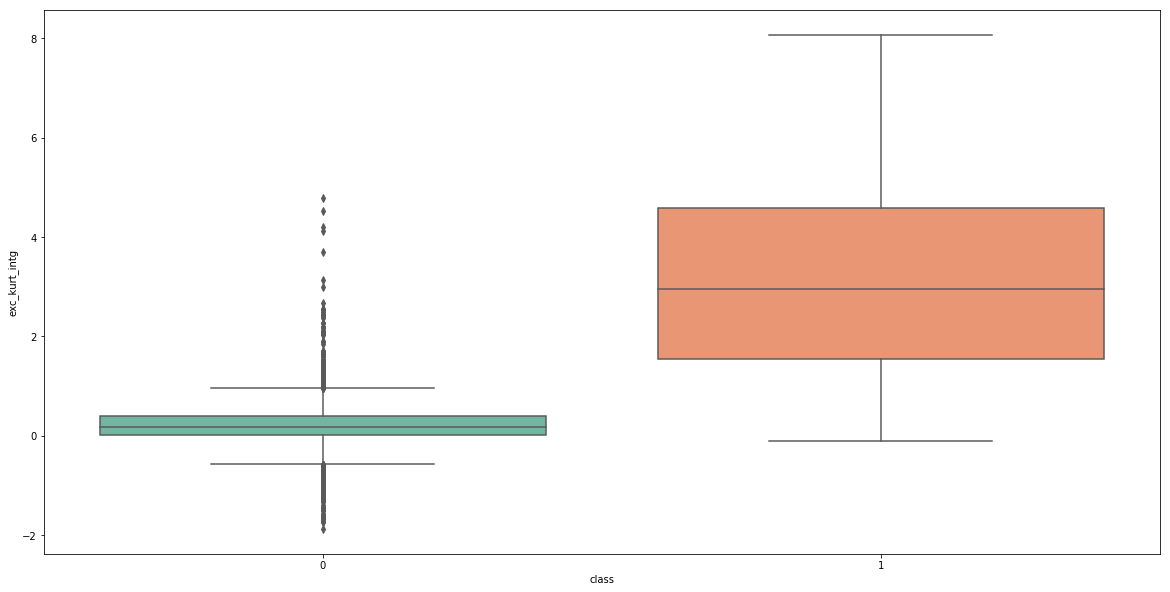

In [22]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'exc_kurt_intg', data=pulsars_Df)
plt.show()

-- Var 3 Ends -- 

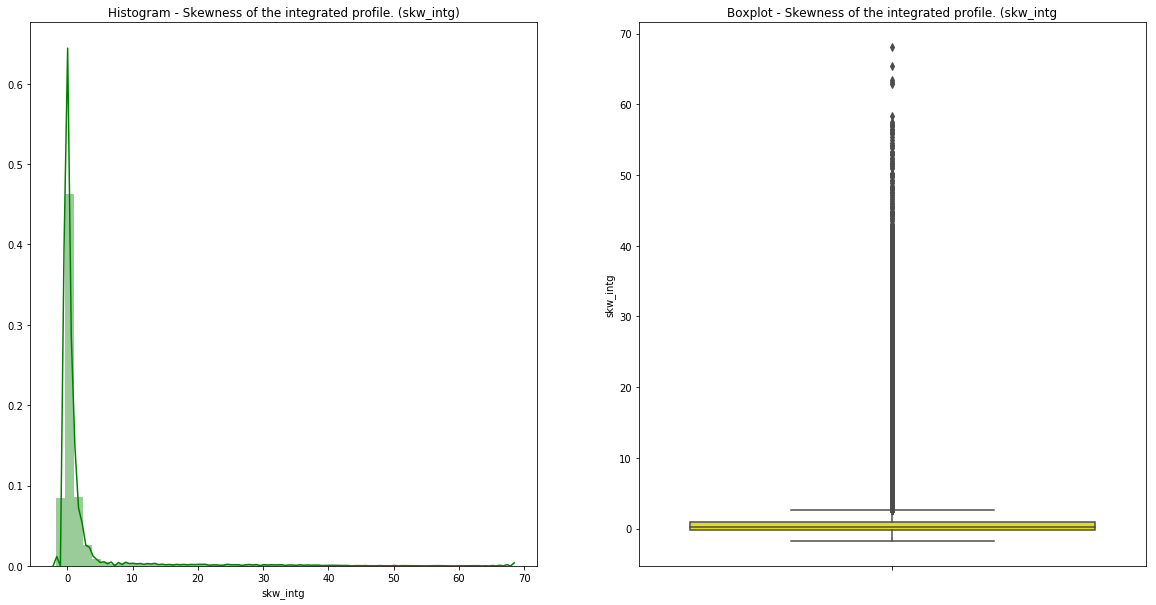

In [23]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Skewness of the integrated profile. (skw_intg)")
sns.distplot(pulsars_Df['skw_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Skewness of the integrated profile. (skw_intg")
sns.boxplot(x = 'skw_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

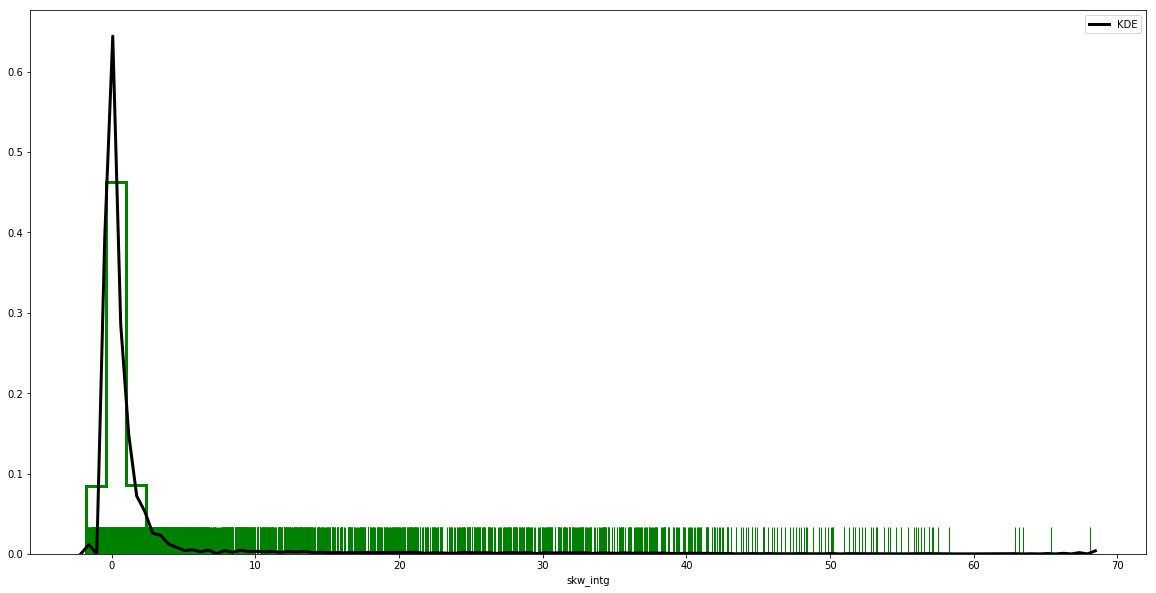

In [24]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['skw_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [25]:
# Check how many values of skw_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['skw_intg']) - (3 * np.std(pulsars_Df['skw_intg']))
b = np.mean(pulsars_Df['skw_intg']) + (3 * np.std(pulsars_Df['skw_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['skw_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['skw_intg'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 526


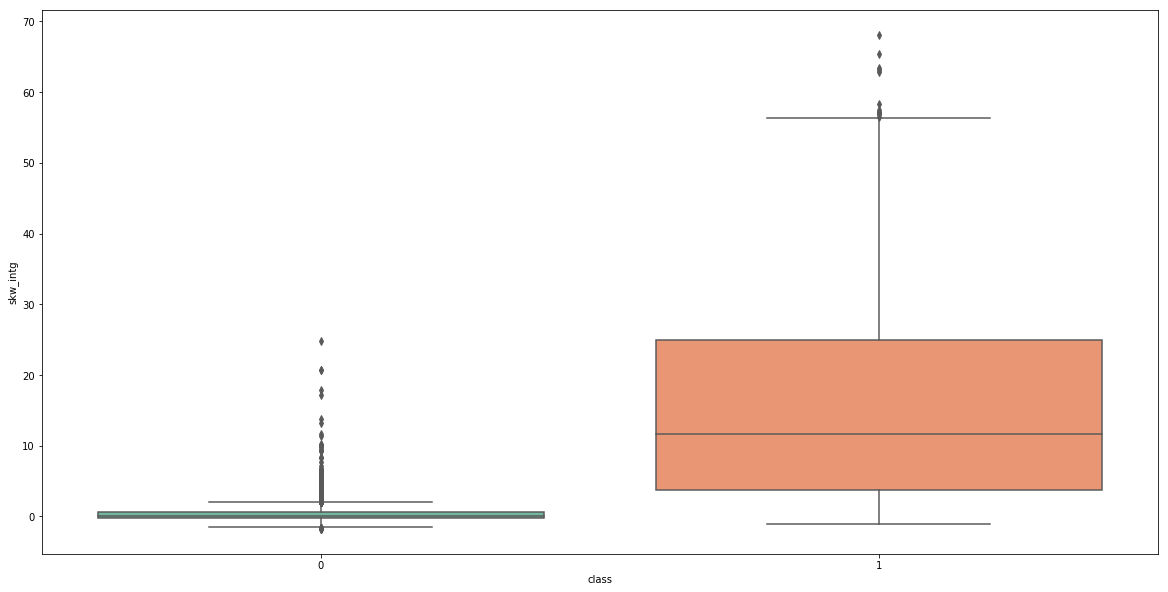

In [26]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'skw_intg', data=pulsars_Df)
plt.show()

--Var 4 End --

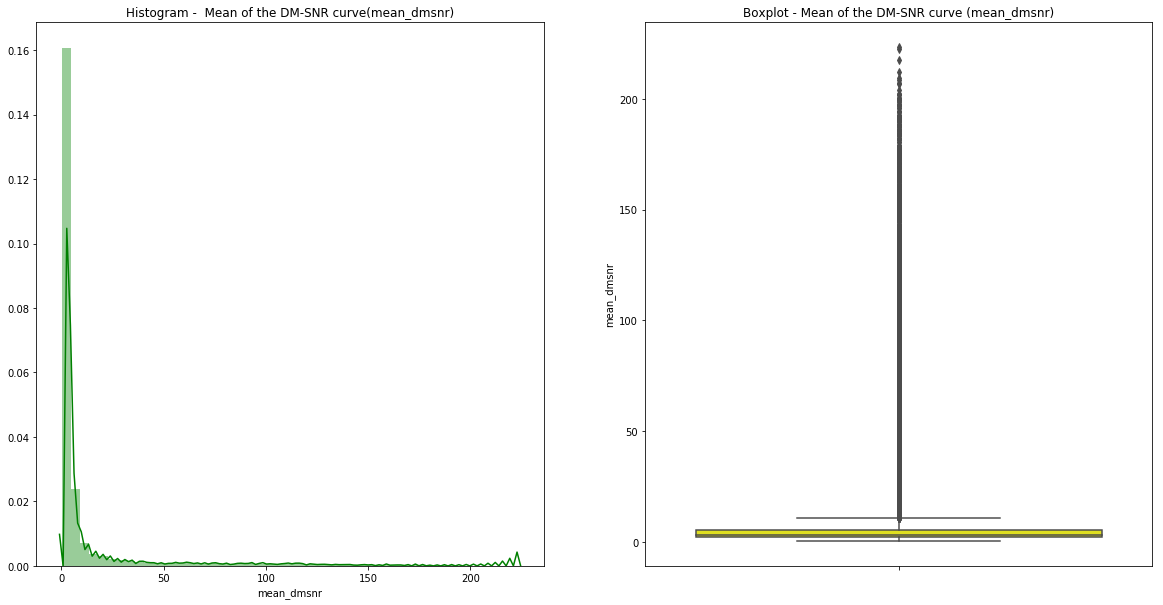

In [27]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram -  Mean of the DM-SNR curve(mean_dmsnr)")
sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the DM-SNR curve (mean_dmsnr)")
sns.boxplot(x = 'mean_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

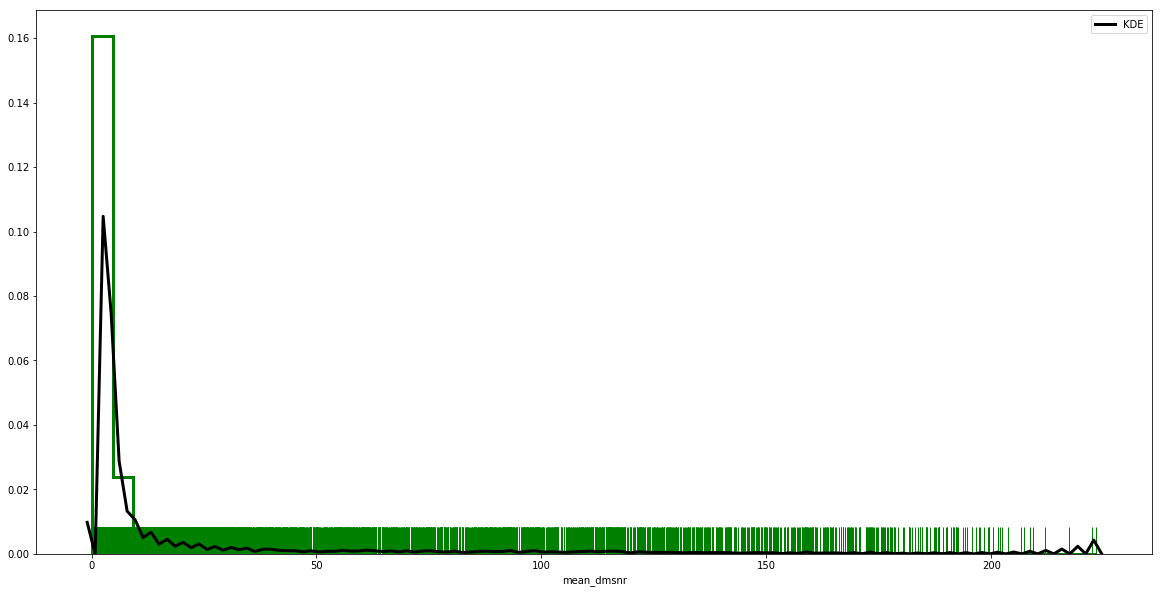

In [28]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['mean_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [29]:
# Check how many values of mean_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['mean_dmsnr']) - (3 * np.std(pulsars_Df['mean_dmsnr']))
b = np.mean(pulsars_Df['mean_dmsnr']) + (3 * np.std(pulsars_Df['mean_dmsnr']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_dmsnr'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_dmsnr'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 654


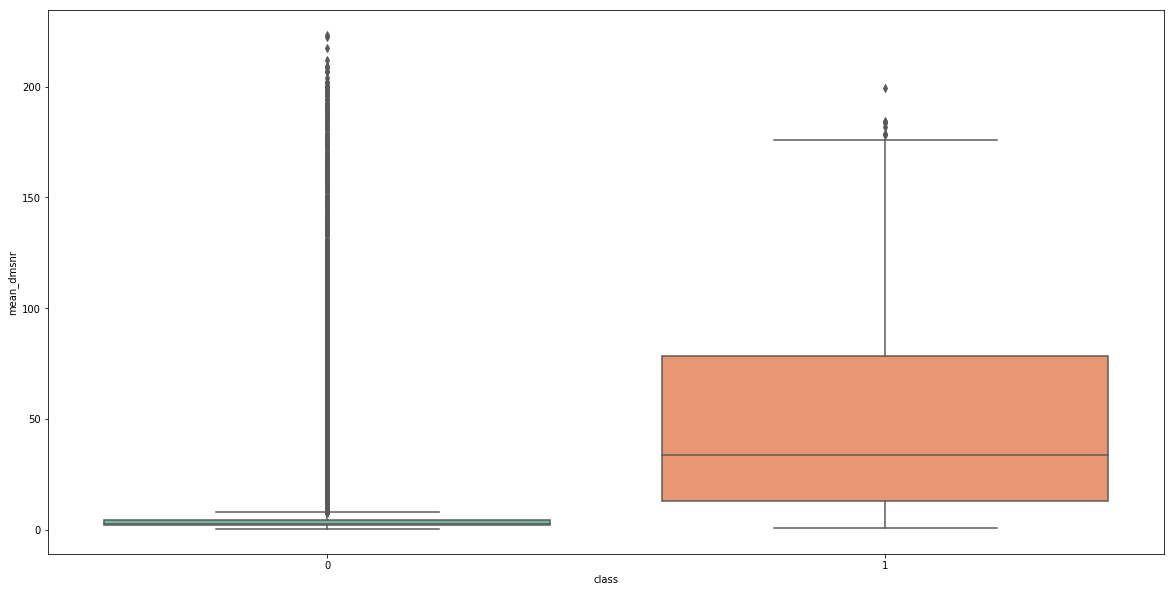

In [30]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'mean_dmsnr', data=pulsars_Df)
plt.show()

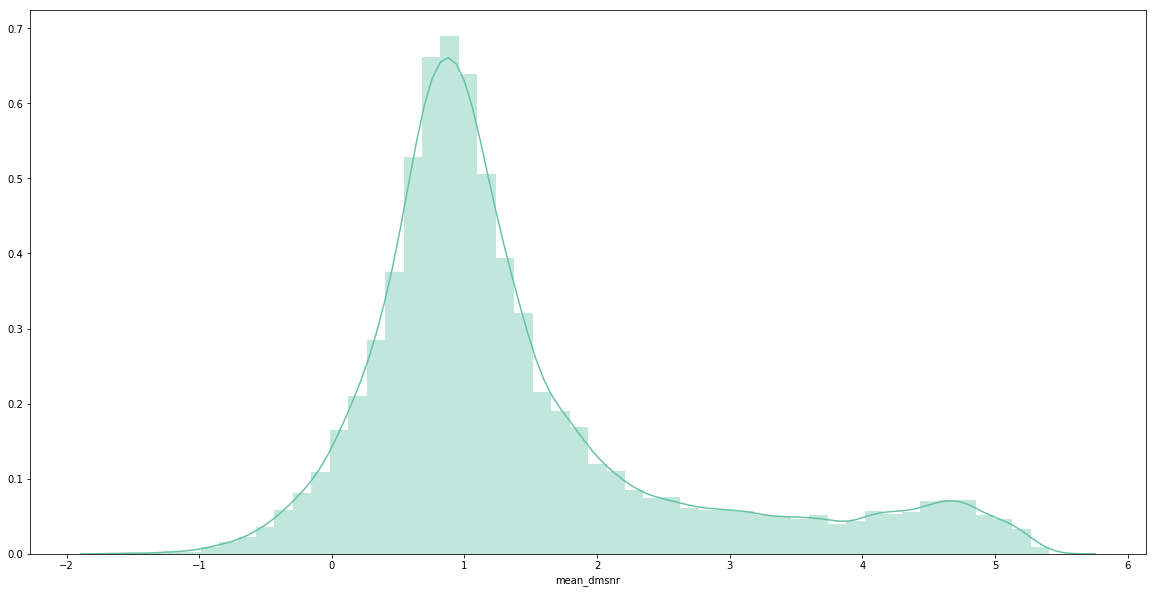

In [31]:
# Taking log of mean_dmsnr variable
fig, axes = plt.subplots(1,1,figsize = (20,10))
sns.distplot(np.log(pulsars_Df['mean_dmsnr']),kde=True, ax=axes)
plt.show()

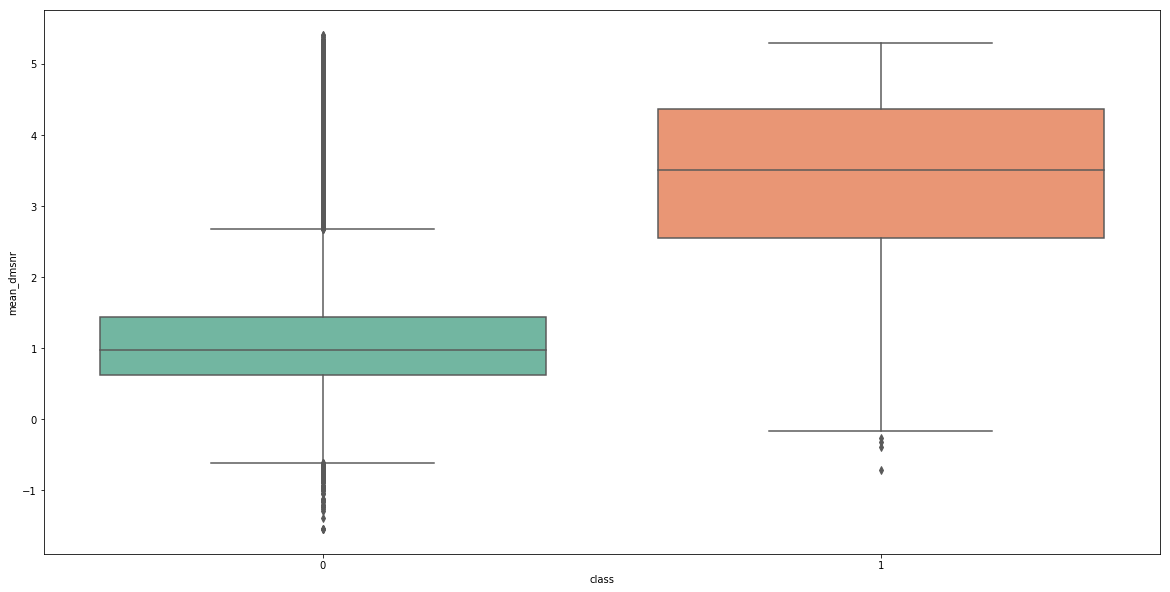

In [32]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['mean_dmsnr']), data=pulsars_Df)
plt.show()

-- Var 5 Ends --

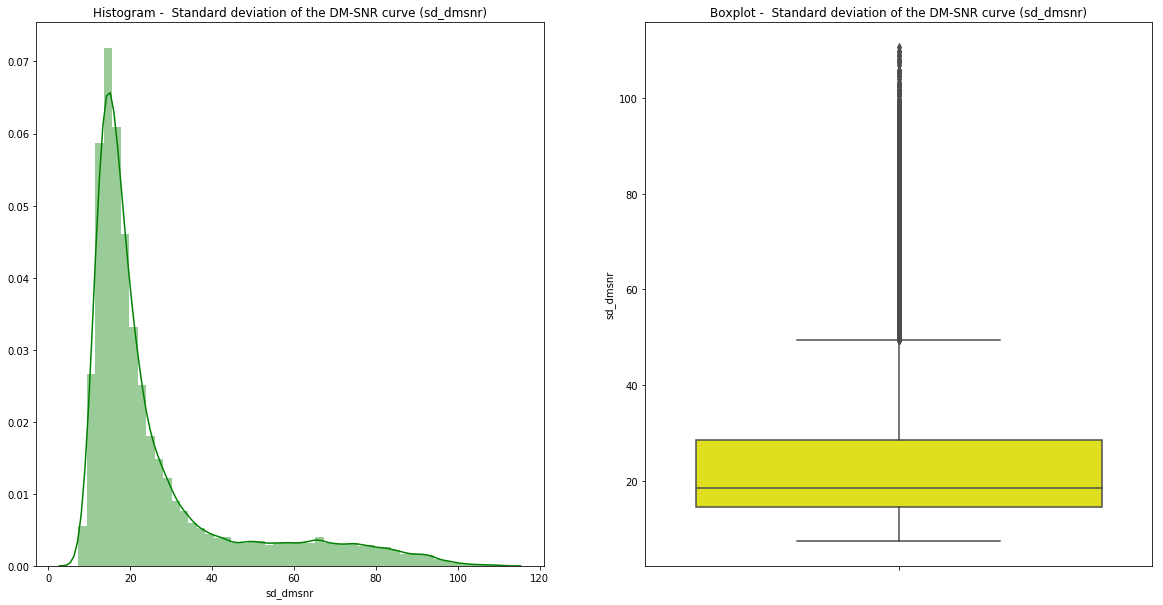

In [33]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram -  Standard deviation of the DM-SNR curve (sd_dmsnr)")
sns.distplot(pulsars_Df['sd_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot -  Standard deviation of the DM-SNR curve (sd_dmsnr)")
sns.boxplot(x = 'sd_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

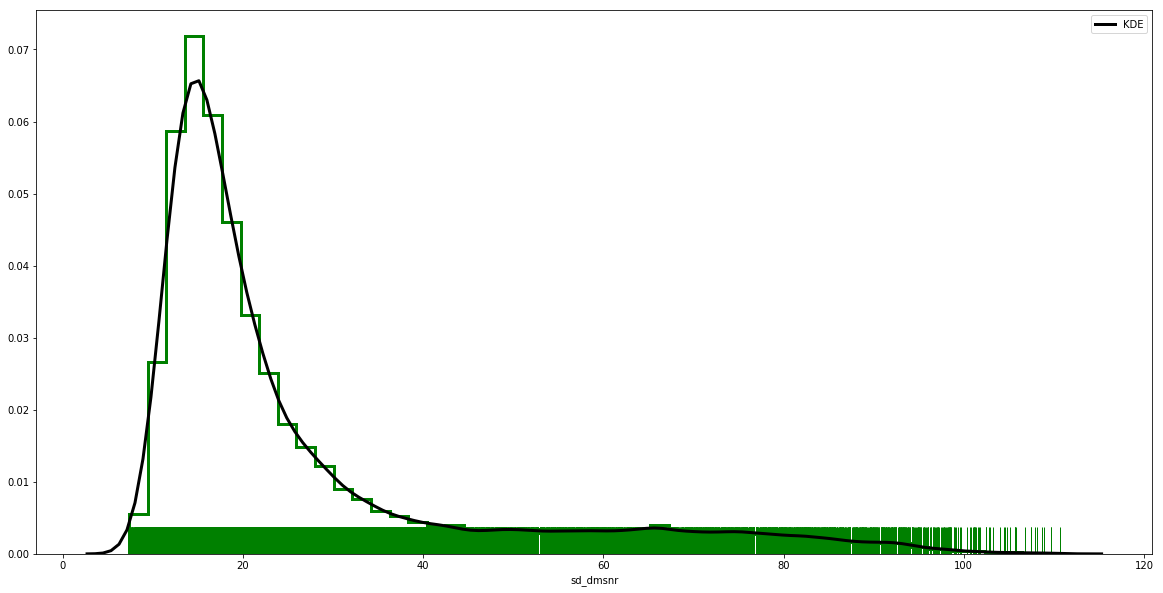

In [34]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['sd_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [35]:
# Check how many values of sd_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['sd_dmsnr']) - (3 * np.std(pulsars_Df['sd_dmsnr']))
b = np.mean(pulsars_Df['sd_dmsnr']) + (3 * np.std(pulsars_Df['sd_dmsnr']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_dmsnr'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_dmsnr'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 406


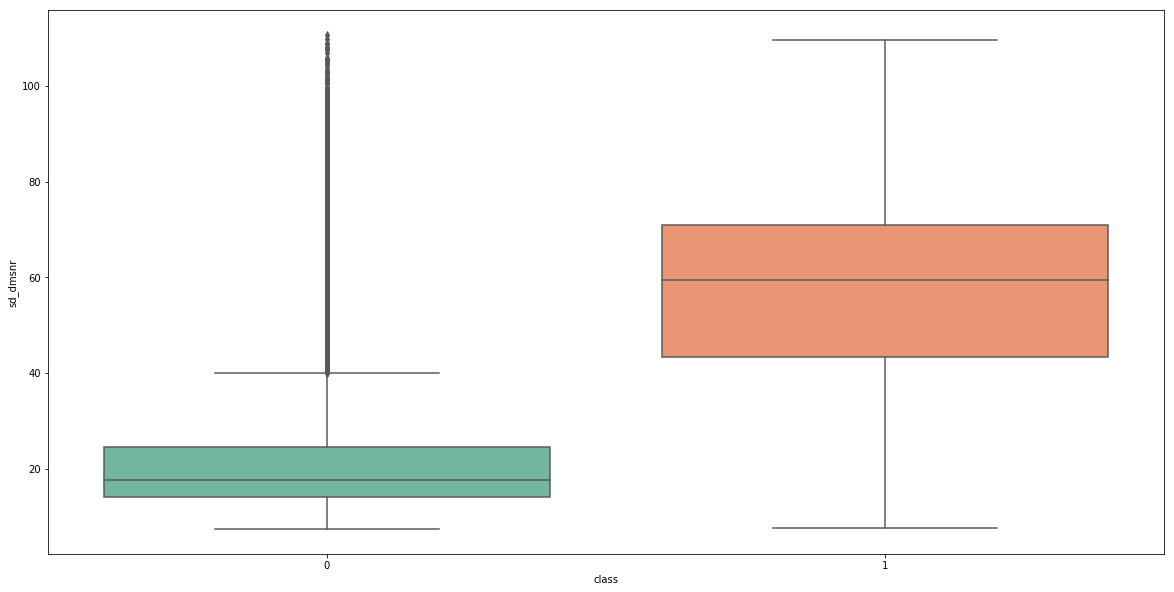

In [36]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = pulsars_Df['sd_dmsnr'], data=pulsars_Df)
plt.show()

In [37]:
# Looking at 25 values at random that are greater than 3 std.
pulsars_Df[pulsars_Df['sd_dmsnr'] > b].head(25)

mean_intg    sd_intg  exc_kurt_intg   skw_intg  mean_dmsnr    sd_dmsnr  \
134   126.398438  60.418248       0.048077  -0.814893   66.547659   85.322761   
359    60.632812  47.564737       2.401281   5.858265   93.586957   89.542258   
364   169.539062  57.060673      -1.082567   0.624954  127.636288   94.410682   
447    86.218750  53.083357       0.972318   0.341129  139.614549  101.090779   
505    42.023438  33.027088       3.668886  19.648005   87.904682   86.479951   
673   147.523438  52.398856      -0.440764  -0.210694   79.328595   93.943998   
688    57.398438  44.955245       2.638750   7.709673   59.050167   85.546869   
709   137.875000  51.161967       0.015710  -0.306694   77.465719   89.397611   
784   160.601562  54.810802      -1.130722   0.991810  135.439799   95.842195   
787   137.343750  52.050822      -0.400641  -0.119314  105.989130   91.672115   
877   139.054688  46.640130       0.042860  -0.396081  129.867893   98.018415   
934   127.828125  50.540997       0.090408  -0.334408   62.443980   87.361516   
996   111.289062  57.133499       0.419450  -0.466672  168.258361   91.612556   
1037  115.476562  47.230314       0.125991  -0.130416   88.088629   88.351554   
1269  154.656250  44.079374      -0.224626   0.311801   76.215719   94.202551   
1330  119.140625  57.019697       0.377411  -0.986065   90.950669   87.700492   
1493   28.546875  29.131399       5.421874  34.243176   56.295987   85.124408   
1548  115.343750  56.825038       0.314129  -0.748100  102.100334   88.659376   
1673  107.554688  75.139434       0.526715  -1.286904   87.088629   91.049357   
1775   98.359375  51.190626       1.057578   0.759414  134.582776   94.924652   
2000  120.156250  53.934051      -0.075318  -0.601715   65.014214   84.871045   
2019  110.992188  56.748692       0.529349  -0.628165  160.493311   96.803316   
2081  111.781250  53.471946       0.205553  -0.321112  108.350334   92.056585   
2094   50.195312  30.431033       3.255719  18.661811   78.260033   87.392208   
2265  147.101562  50.324702      -0.797783   0.147756  107.467391  110.642211   

      exc_kurt_dmsnr  skw_dmsnr  class  
134         0.750702  -1.037197      0  
359         0.383887  -1.319026      1  
364        -0.276185  -1.578509      0  
447        -0.612073  -1.548335      0  
505         0.259049  -1.504341      1  
673         0.481280  -1.551990      0  
688         1.141041  -0.250512      1  
709         0.463503  -1.551208      0  
784        -0.424526  -1.492953      0  
787         0.003882  -1.648097      0  
877        -0.144233  -1.706513      0  
934         0.908055  -0.876787      0  
996        -1.090745  -0.525926      0  
1037        0.149566  -1.766947      0  
1269        0.531849  -1.551833      0  
1330        0.273337  -1.510652      0  
1493        1.229159  -0.059996      1  
1548       -0.092917  -1.674608      0  
1673        0.467833  -1.357949      0  
1775       -0.481317  -1.497141      1  
2000        0.708684  -1.225191      0  
2019       -0.971316  -0.941511      0  
2081       -0.147072  -1.722876      0  
2094        0.631438  -1.088491      1  
2265        0.072755  -1.976976      0

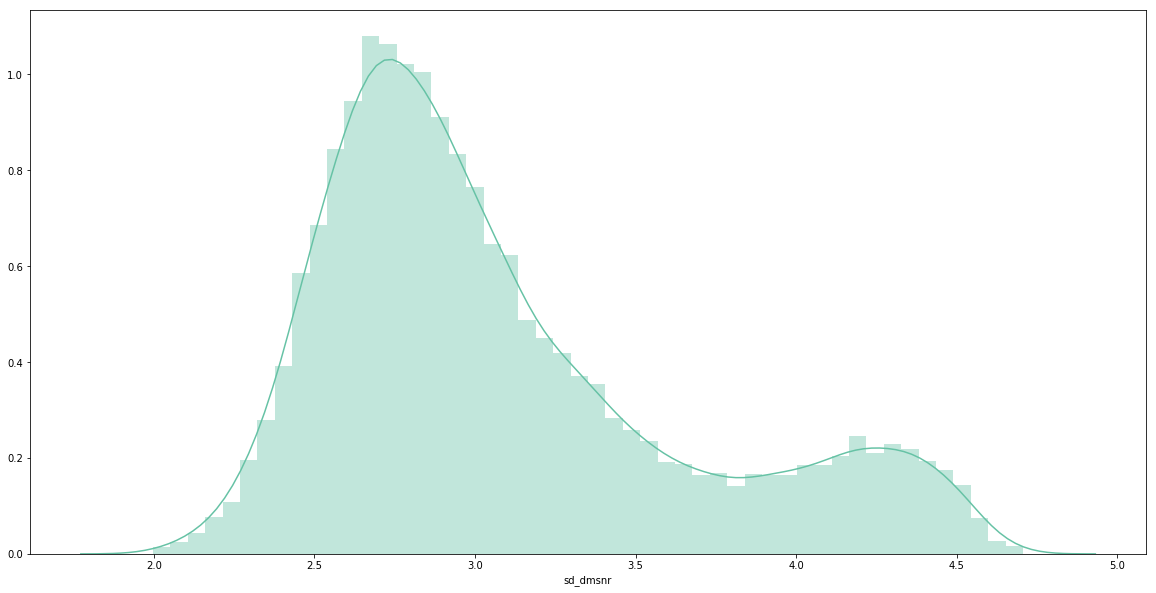

In [38]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
sns.distplot(np.log(pulsars_Df['sd_dmsnr']),kde=True, ax=axes)
plt.show()

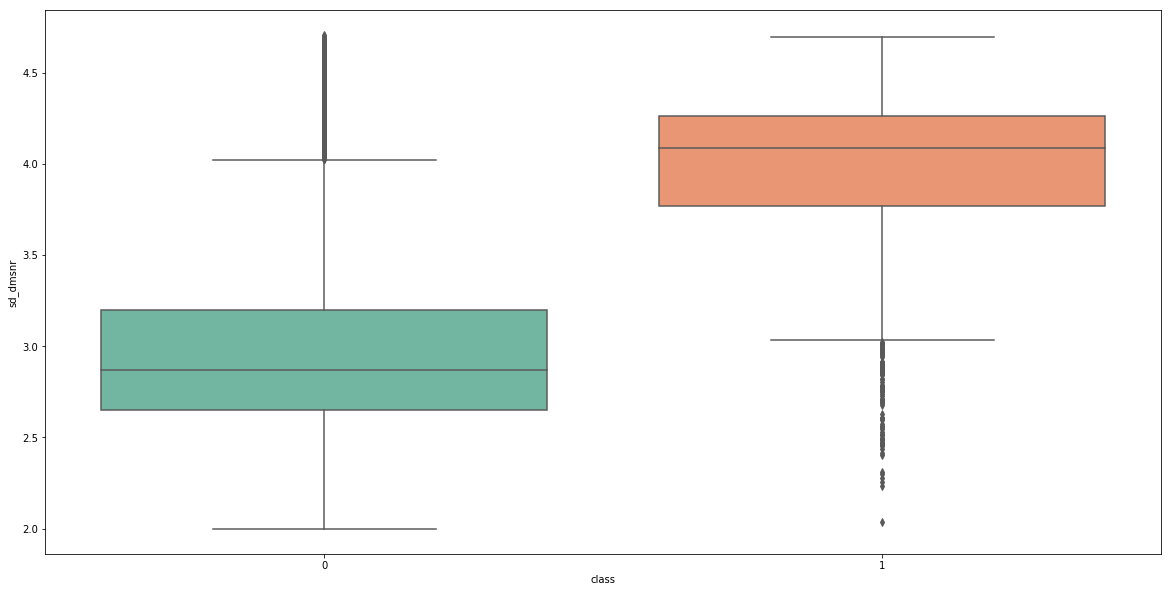

In [39]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['sd_dmsnr']), data=pulsars_Df)
plt.show()

--  Var 6 Ends --

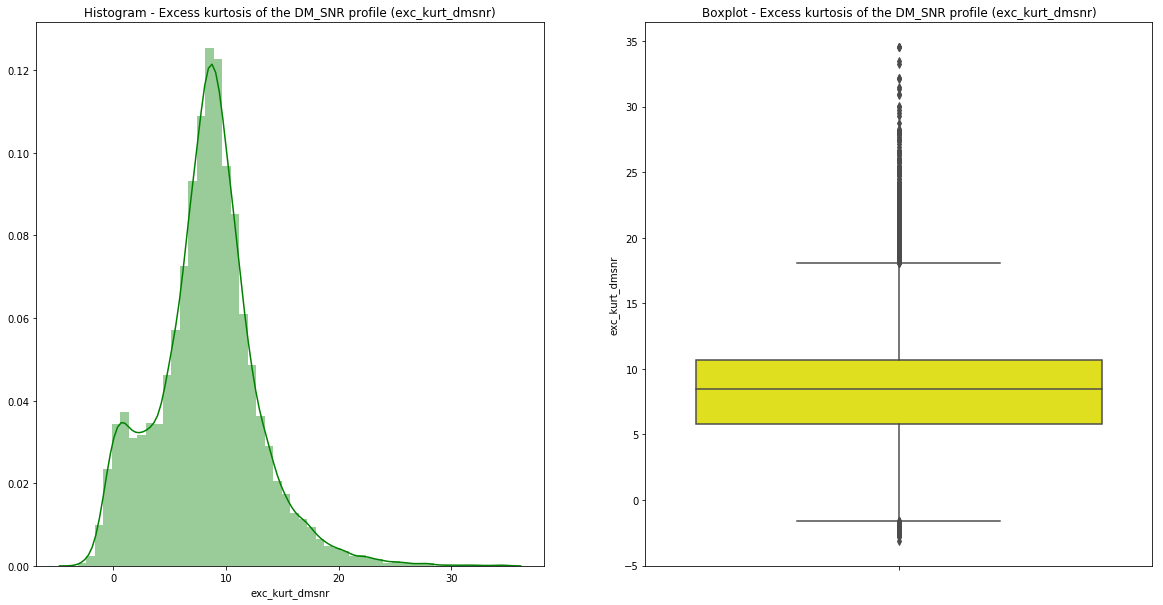

In [40]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Excess kurtosis of the DM_SNR profile (exc_kurt_dmsnr)")
sns.distplot(pulsars_Df['exc_kurt_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Excess kurtosis of the DM_SNR profile (exc_kurt_dmsnr)")
sns.boxplot(x = 'exc_kurt_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

Histogram reflects close to that of normalized data, skews slightly toward right for a small number . From the above plots, it is evident that about 50% records have excess kurtosis values for DM_SNR profile in an approx range of (7,12), with median around 8. We do see few outliers which we can check further by studying how many records are outside 3 std deviations away. 

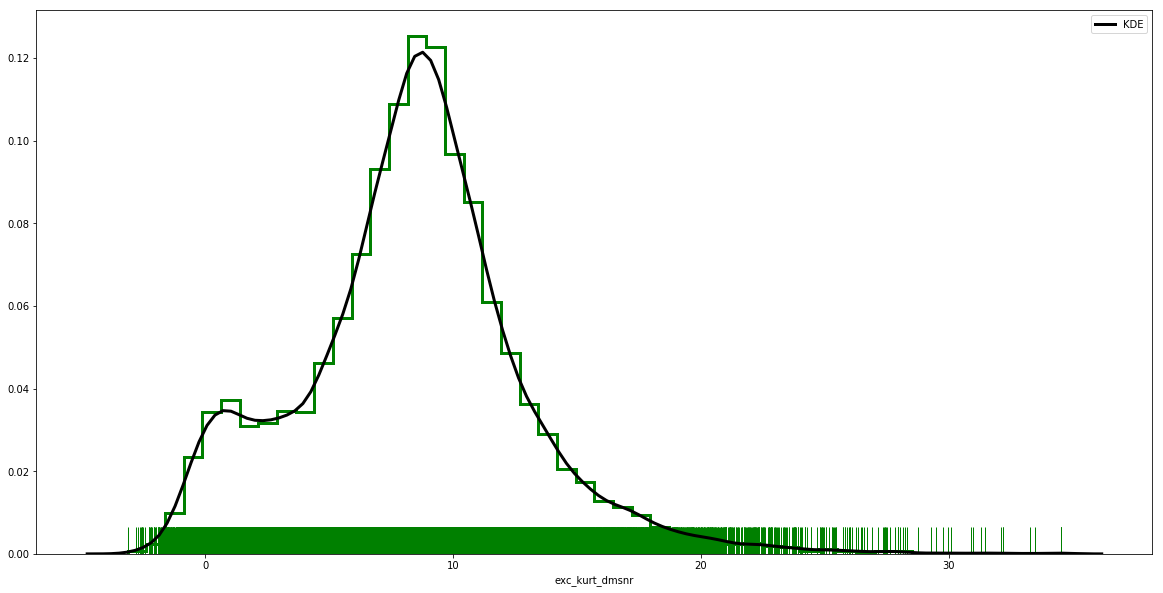

In [41]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['exc_kurt_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

Since variable "exc_kurt_dmsnr" is a continuous variable, we have plotted a kdeplot and rugplot for the values. And while the distribution is almost normal, we cna see that majority values lie within (-2,22) and clearly shows the < 1% outliers

In [42]:
# Check how many values of exc_kurt_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['exc_kurt_dmsnr']) - (3 * np.std(pulsars_Df['exc_kurt_dmsnr']))
b = np.mean(pulsars_Df['exc_kurt_dmsnr']) + (3 * np.std(pulsars_Df['exc_kurt_dmsnr']))
print("3 std deviations range : %f - %f" %(a , b) )
print("Number of values > 3 Std. = %s" %pulsars_Df[~pulsars_Df['exc_kurt_dmsnr'].between (a,b,inclusive=True) ]['class'].count())
p = (pulsars_Df[~pulsars_Df['exc_kurt_dmsnr'].between (a,b,inclusive=True) ]['class'].count()/pulsars_Df['class'].count())*100

print("% of values > 3 Std. = " + "{:.2f}".format(p) + "%")

3 std deviations range : -5.214342 - 21.821454
Number of values > 3 Std. = 156
% of values > 3 Std. = 0.87%


From the above calculations we know that < 1% records are greater than 3 std deviations away. 

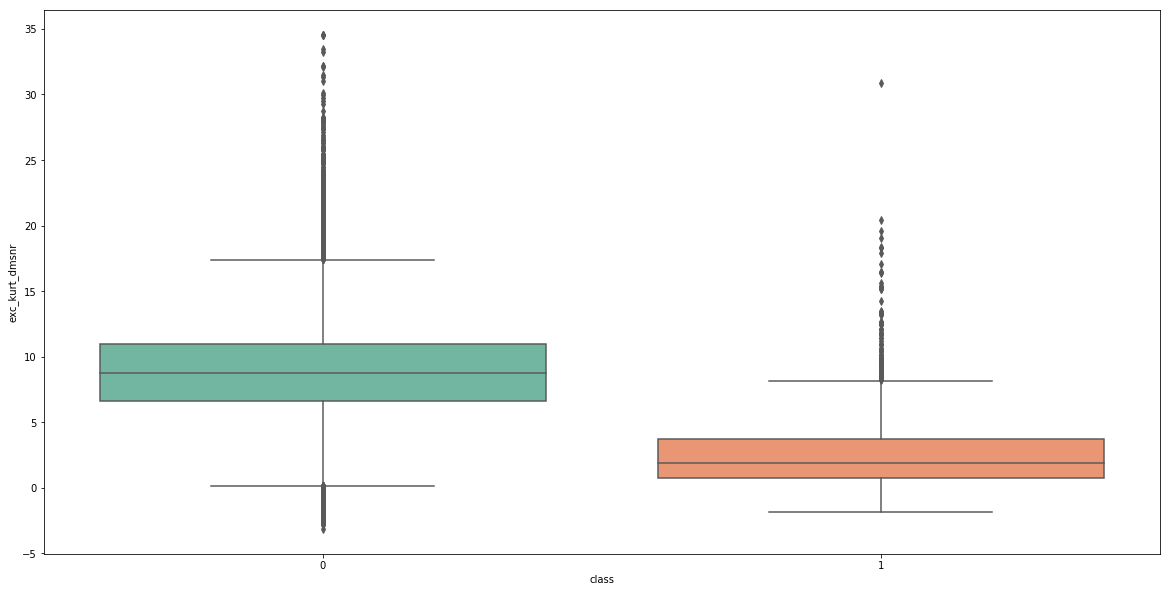

In [43]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'exc_kurt_dmsnr', data=pulsars_Df)
plt.show()

From the above box plots to compare the "exc_kurt_dmsnr" value for the 2 classes (pulsar or not pulsar ), we can see that non-pulsar stars have a  higher value of excess kurtosis for the dm_snr profile, with 50% range around (7,12) with average around 8, which reflects our general range for this value for the entire set.This also agrees with the dataset having majority of non-pulsars. On the other hand pulsar stars have a lower excess kurtosis value for the DM_SNR profile with 50% of data ranging (1,4) and an average of approx 2. There are few outliers for the pulsar stars but when compared to the entire dataset, almost all values of pulsar stars are within the inter quartile range.

-- var 7 ends--

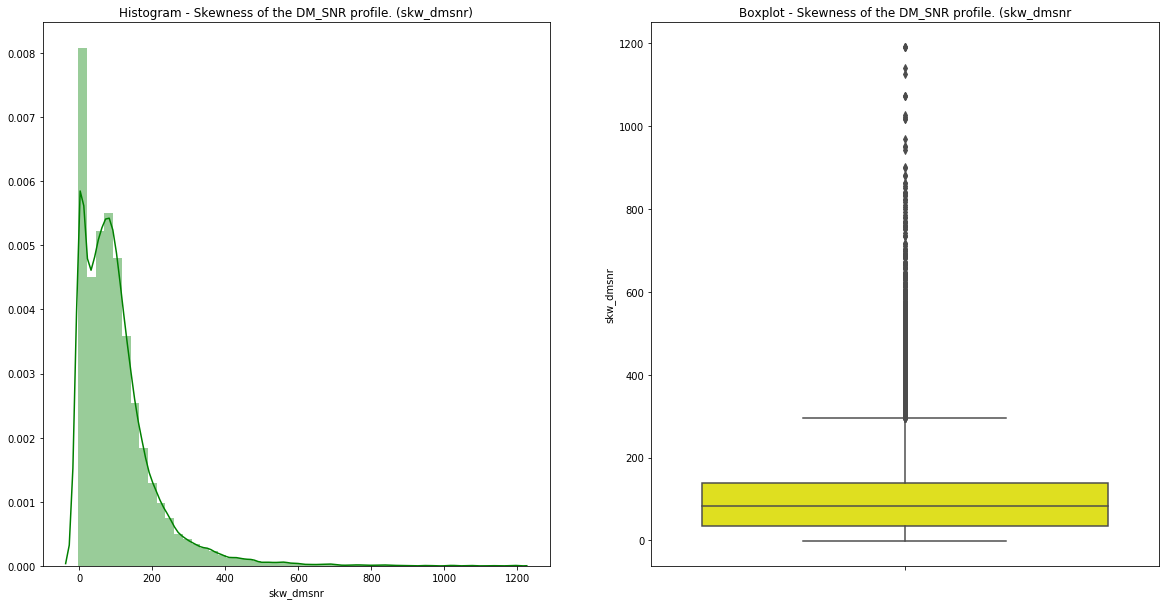

In [44]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Skewness of the DM_SNR profile. (skw_dmsnr)")
sns.distplot(pulsars_Df['skw_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Skewness of the DM_SNR profile. (skw_dmsnr")
sns.boxplot(x = 'skw_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

Although variable "skw_dmsnr" i.e. skewness of the DM_SNR profile is continuous we have created a histogram to get a high level frequency of the values and it clearly shows the data is right skewed. While 50% of data have value approxing (0,180) with an average around 100 we do see quiet a few outliers on the higher end.

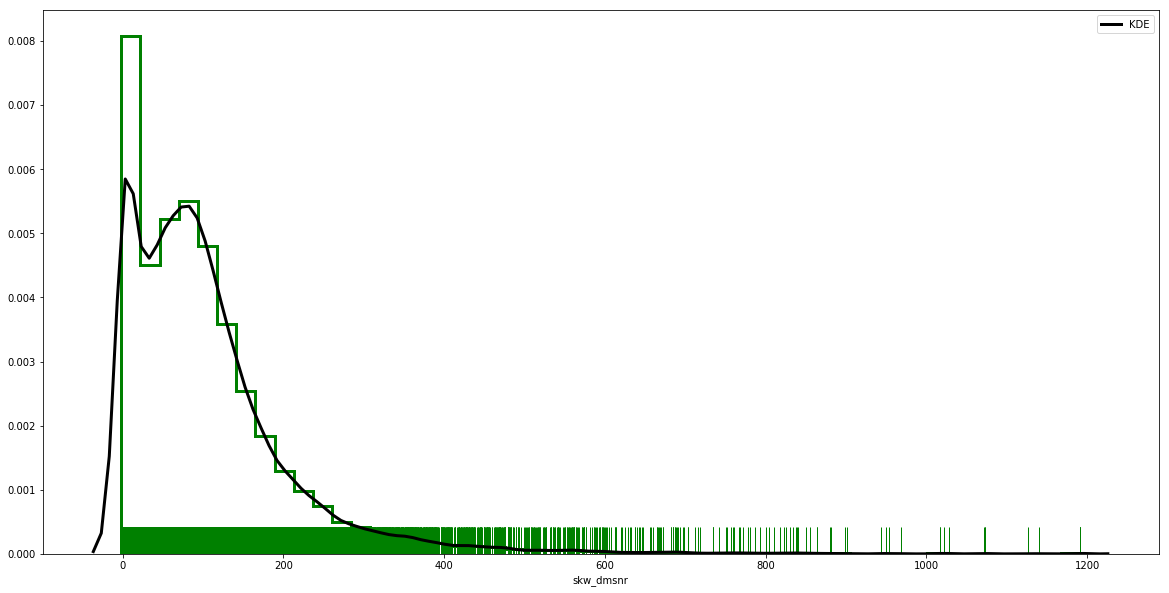

In [45]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['skw_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

Above kdeplot and rugplot shows higher density for values ranging from (0,400) after which outliers start showing gaps. Majority of the stars have the value int he range of (0,400) 

In [46]:
# Check how many values of skw_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['skw_dmsnr']) - (3 * np.std(pulsars_Df['skw_dmsnr']))
b = np.mean(pulsars_Df['skw_dmsnr']) + (3 * np.std(pulsars_Df['skw_dmsnr']))
print("3 std deviations range : %f - %f" %(a , b) )
print("Number of values > 3 Std. = %s" %pulsars_Df[~pulsars_Df['skw_dmsnr'].between (a,b,inclusive=True) ]['class'].count())
p = (pulsars_Df[~pulsars_Df['skw_dmsnr'].between (a,b,inclusive=True) ]['class'].count()/pulsars_Df['class'].count())*100

print("% of values > 3 Std. = " + "{:.2f}".format(p) + "%")


3 std deviations range : -214.676983 - 424.392400
Number of values > 3 Std. = 337
% of values > 3 Std. = 1.88%


 Above caluclations show that close to 1.8% records have skw_dmsnr outside 3 std deviations and going by the values of this range , we can say the outliers are approximately 2% of the entire dataset.

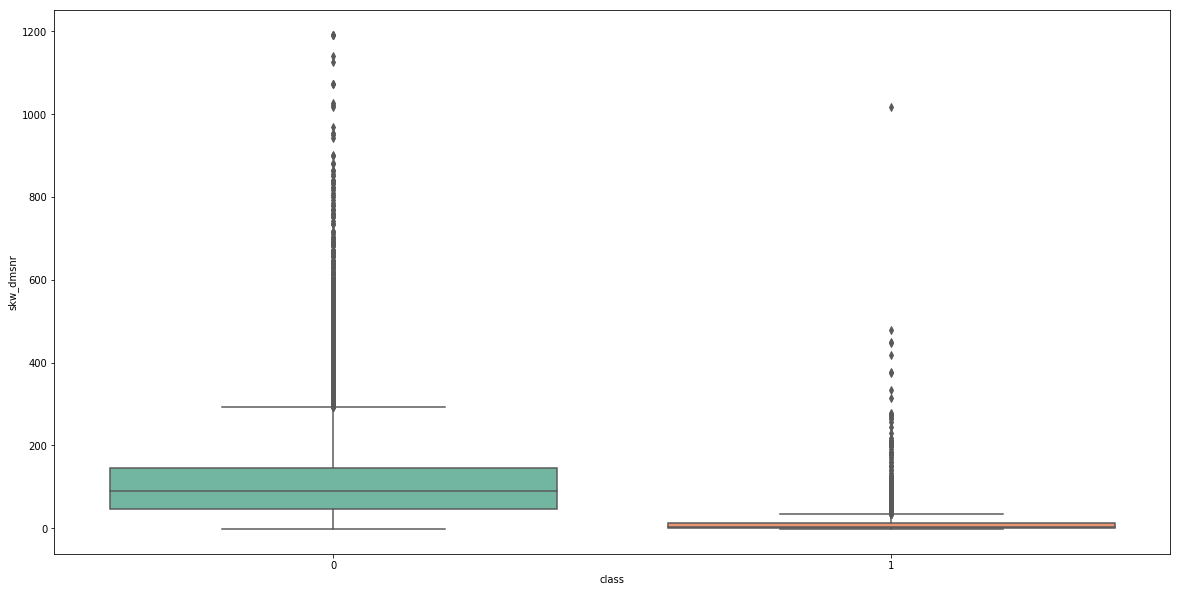

In [47]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'skw_dmsnr', data=pulsars_Df)
plt.show()

Since the dataset is unbalanced we can see that non-pulsar stars reflect same pattern as the entire dataset for this value, having 50% records in the range of (0,180) and a lot of outliers on the hihgher end. On the other hand pulsar stars form a smaller range near 0 and the outliers for this subset falls within the normal range of the entire dataset. Since the data range is so high, log value will show a better distinction

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


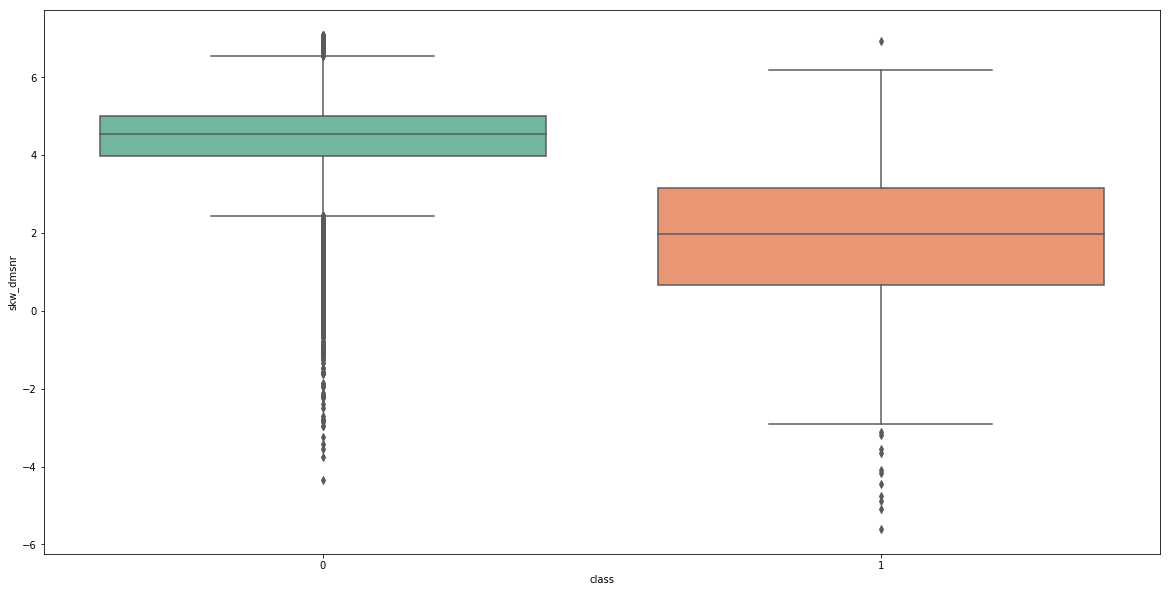

In [48]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['skw_dmsnr']), data=pulsars_Df)
plt.show()

Clearly the skewness of DM_SNR profile for the 2 classes is not overlapping , and also indicates that pulsars show a wider range with a fewer outliers compared to non-pulsars that show a narrow range and more outliers

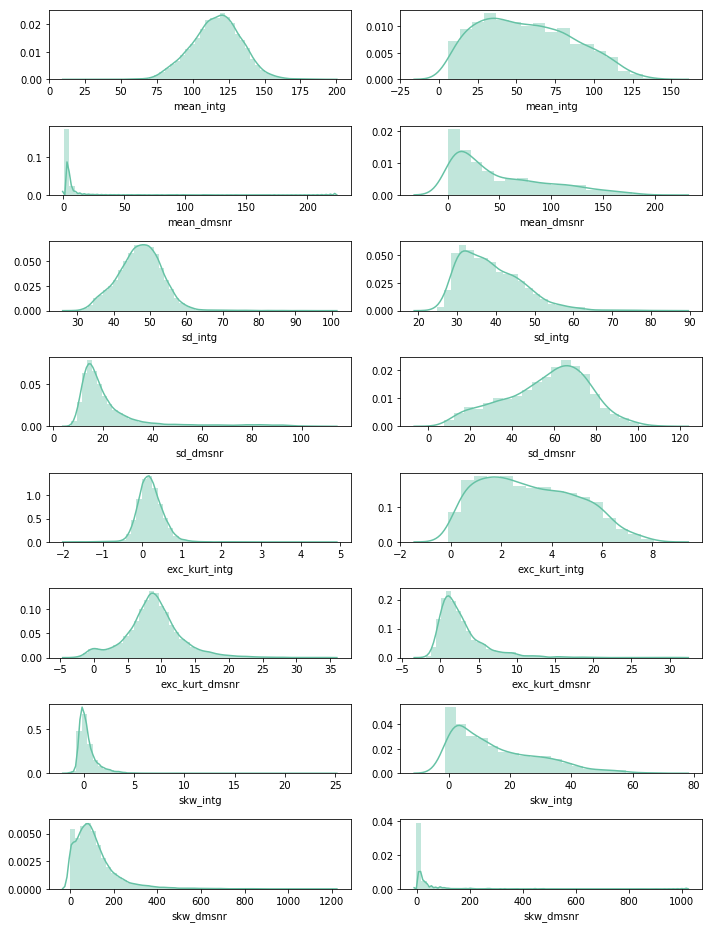

In [49]:


f,axes = plt.subplots(8,2,figsize=(10,13))
#f.figsize(15,15)
#f = plt.figure(figsize=(15,15))
sns.distplot(pulsars_Df[pulsars_Df['class']==0]['mean_intg'] ,kde=True, ax=axes[0,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['mean_intg'],kde=True, ax=axes[0,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0][pulsars_Df['class']==0]['mean_dmsnr'] ,kde=True, ax=axes[1,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1][pulsars_Df['class']==1]['mean_dmsnr'],kde=True, ax=axes[1,1])

#sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[0,1])
sns.distplot(pulsars_Df[pulsars_Df['class']==0]['sd_intg'],kde=True, ax=axes[2,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['sd_intg'],kde=True, ax=axes[2,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['sd_dmsnr'],kde=True, ax=axes[3,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['sd_dmsnr'],kde=True, ax=axes[3,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['exc_kurt_intg'],kde=True, ax=axes[4,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['exc_kurt_intg'],kde=True, ax=axes[4,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['exc_kurt_dmsnr'],kde=True, ax=axes[5,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['exc_kurt_dmsnr'],kde=True, ax=axes[5,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['skw_intg'],kde=True, ax=axes[6,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['skw_intg'],kde=True, ax=axes[6,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['skw_dmsnr'],kde=True, ax=axes[7,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['skw_dmsnr'],kde=True, ax=axes[7,1])

plt.tight_layout()

Text(0.5, 0, 'skw_intg')

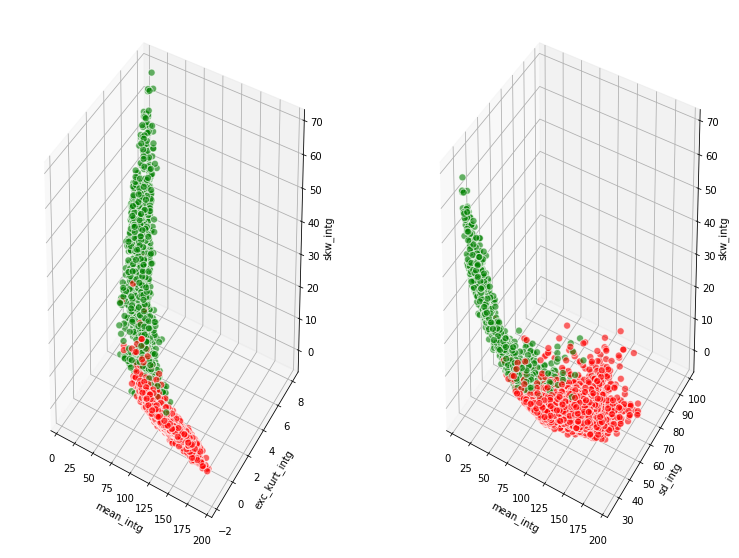

In [50]:
from mpl_toolkits.mplot3d import Axes3D
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

xs = pulsars_Df['mean_intg']
ys = pulsars_Df['exc_kurt_intg']
zs = pulsars_Df['skw_intg']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_intg')
ax.set_ylabel('exc_kurt_intg')
ax.set_zlabel('skw_intg')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

xs = pulsars_Df['mean_intg']
ys = pulsars_Df['sd_intg']
zs = pulsars_Df['skw_intg']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_intg')
ax.set_ylabel('sd_intg')
ax.set_zlabel('skw_intg')

-- green for pulsars and red for non-pulsars  
Based on the integrated profile values, we can see that the records show 2 distinct clusters with some overlap. 

Pulsars generally have a lower mean value for integrated profile with a few outliers having higher value, on the other hand non-pulsars have a wide range of mean values for hte integrated profile.

Pulsars have a higher range of skewness for the integrated profile while non-pulsars have lower range of skewness 

excess kurtosis for integrated profile , similar to mean values differentiate the 2 classes with a small  overlap 

Std deviation for the integrated profile shows an overalap between the classes.

Text(0.5, 0, 'skw_dmsnr')

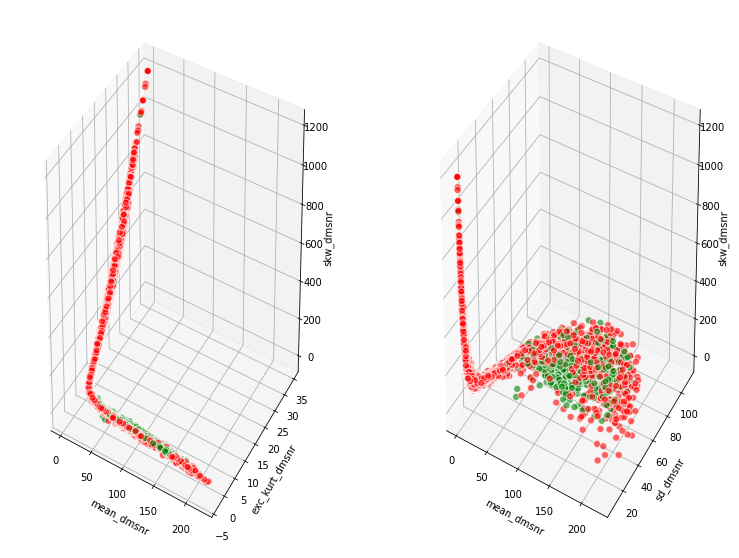

In [51]:
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

xs = pulsars_Df['mean_dmsnr']
ys = pulsars_Df['exc_kurt_dmsnr']
zs = pulsars_Df['skw_dmsnr']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_dmsnr')
ax.set_ylabel('exc_kurt_dmsnr')
ax.set_zlabel('skw_dmsnr')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

xs = pulsars_Df['mean_dmsnr']
ys = pulsars_Df['sd_dmsnr']
zs = pulsars_Df['skw_dmsnr']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_dmsnr')
ax.set_ylabel('sd_dmsnr')
ax.set_zlabel('skw_dmsnr')

-- green for pulsars and red for non-pulsars

There is a lot of overlap in the DM_SNR profile. Few inferences though,
mean is low , close to 0, skewness has a wide range, as mean increases > 0 , skewness is relatively low 

for lower mean values in this profile, excess kurtosis increases as skewness increases.

For the higher mean, low skewness records, std deviation is all over and shows a somwhat circular plot,with a lot of overlap

In [52]:
## Attempt to diff variables for integrated profile and DM_SNR profile to see if these show less overlap in clusters
pulsars_diff_Df=pulsars_Df.copy()
pulsars_diff_Df['mean_diff']=pulsars_diff_Df['mean_intg']-pulsars_diff_Df['mean_dmsnr']
pulsars_diff_Df['sd_diff']=pulsars_diff_Df['sd_intg']-pulsars_diff_Df['sd_dmsnr']
pulsars_diff_Df['exc_kurt_diff']=pulsars_diff_Df['exc_kurt_intg']-pulsars_diff_Df['exc_kurt_dmsnr']
pulsars_diff_Df['skw_diff']=pulsars_diff_Df['skw_intg']-pulsars_diff_Df['skw_dmsnr']

Text(0.5, 0, 'skw_diff')

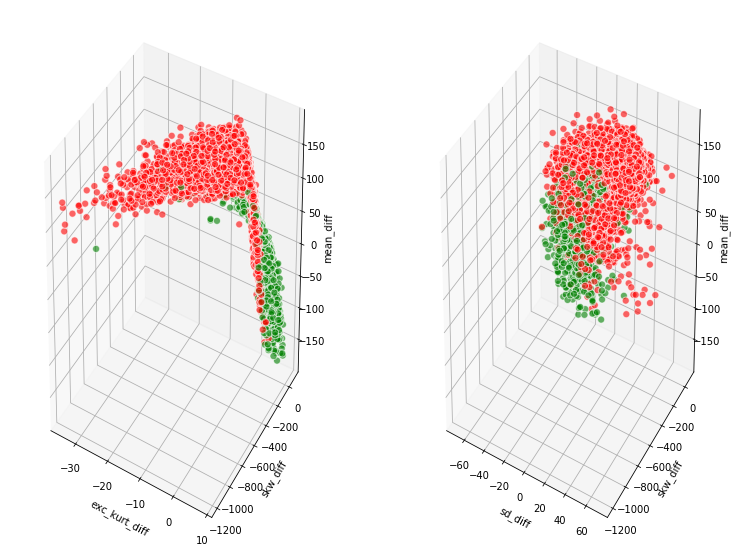

In [53]:
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

zs = pulsars_diff_Df['mean_diff']
xs = pulsars_diff_Df['exc_kurt_diff']
ys = pulsars_diff_Df['skw_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_zlabel('mean_diff')
ax.set_xlabel('exc_kurt_diff')
ax.set_ylabel('skw_diff')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

zs = pulsars_diff_Df['mean_diff']
xs = pulsars_diff_Df['sd_diff']
ys = pulsars_diff_Df['skw_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_zlabel('mean_diff')
ax.set_xlabel('sd_diff')
ax.set_ylabel('skw_diff')

Text(0.5, 0, 'skw_diff')

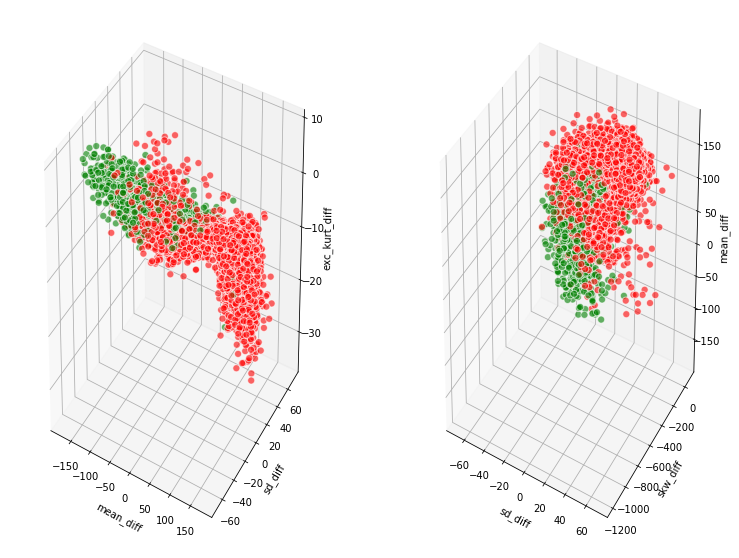

In [54]:
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

xs = pulsars_diff_Df['mean_diff']
zs = pulsars_diff_Df['exc_kurt_diff']
ys = pulsars_diff_Df['sd_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_diff')
ax.set_zlabel('exc_kurt_diff')
ax.set_ylabel('sd_diff')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

zs = pulsars_diff_Df['mean_diff']
xs = pulsars_diff_Df['sd_diff']
ys = pulsars_diff_Df['skw_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_zlabel('mean_diff')
ax.set_xlabel('sd_diff')
ax.set_ylabel('skw_diff')

Multiple combinations of the diff variables, show a lot of overlap for the 2 classes. Overall from the 3D plots , we can see that integrated profiles show less overlap between the classes but the DM_SNR profile and the diff values show a great overlap and so other methods will be looked into to help with better clustering

In [55]:
imputedPulsarDf = pulsars_Df.copy()
imputedPulsarDf['log_mean_dmsnr'] = np.log(imputedPulsarDf['mean_dmsnr'])
imputedPulsarDf['log_sd_dmsnr'] = np.log(imputedPulsarDf['sd_dmsnr'])
imputedPulsarDf.drop(['sd_dmsnr', 'mean_dmsnr'], axis = 1, inplace = True)
imputedPulsarDf.describe()

mean_intg       sd_intg  exc_kurt_intg      skw_intg  \
count  17898.000000  17898.000000   17898.000000  17898.000000   
mean     111.079968     46.549532       0.477857      1.770279   
std       25.652935      6.843189       1.064040      6.167913   
min        5.812500     24.772042      -1.876011     -1.791886   
25%      100.929688     42.376018       0.027098     -0.188572   
50%      115.078125     46.947479       0.223240      0.198710   
75%      127.085938     51.023202       0.473325      0.927783   
max      192.617188     98.778911       8.069522     68.101622   

       exc_kurt_dmsnr     skw_dmsnr         class  log_mean_dmsnr  \
count    17898.000000  17898.000000  17898.000000    17898.000000   
mean         8.303556    104.857709      0.091574        1.390669   
std          4.506092    106.514540      0.288432        1.235812   
min         -3.139270     -1.976976      0.000000       -1.545474   
25%          5.781506     34.960504      0.000000        0.653926   
50%          8.433515     83.064556      0.000000        1.030276   
75%         10.702959    139.309331      0.000000        1.698228   
max         34.539844   1191.000837      1.000000        5.408929   

       log_sd_dmsnr  
count  17898.000000  
mean       3.079164  
std        0.572203  
min        1.997476  
25%        2.669817  
50%        2.915677  
75%        3.347378  
max        4.706302

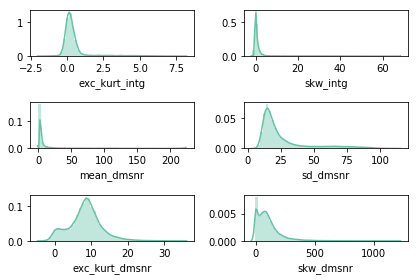

In [56]:
f,axes = plt.subplots(3,2)
sns.distplot(pulsars_Df['exc_kurt_intg'],kde=True, ax=axes[0,0])
sns.distplot(pulsars_Df['skw_intg'],kde=True, ax=axes[0,1])
sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[1,0])
sns.distplot(pulsars_Df['sd_dmsnr'],kde=True, ax=axes[1,1])
sns.distplot(pulsars_Df['exc_kurt_dmsnr'],kde=True, ax=axes[2,0])
sns.distplot(pulsars_Df['skw_dmsnr'],kde=True, ax=axes[2,1])
plt.tight_layout()

## Pairs Plot

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


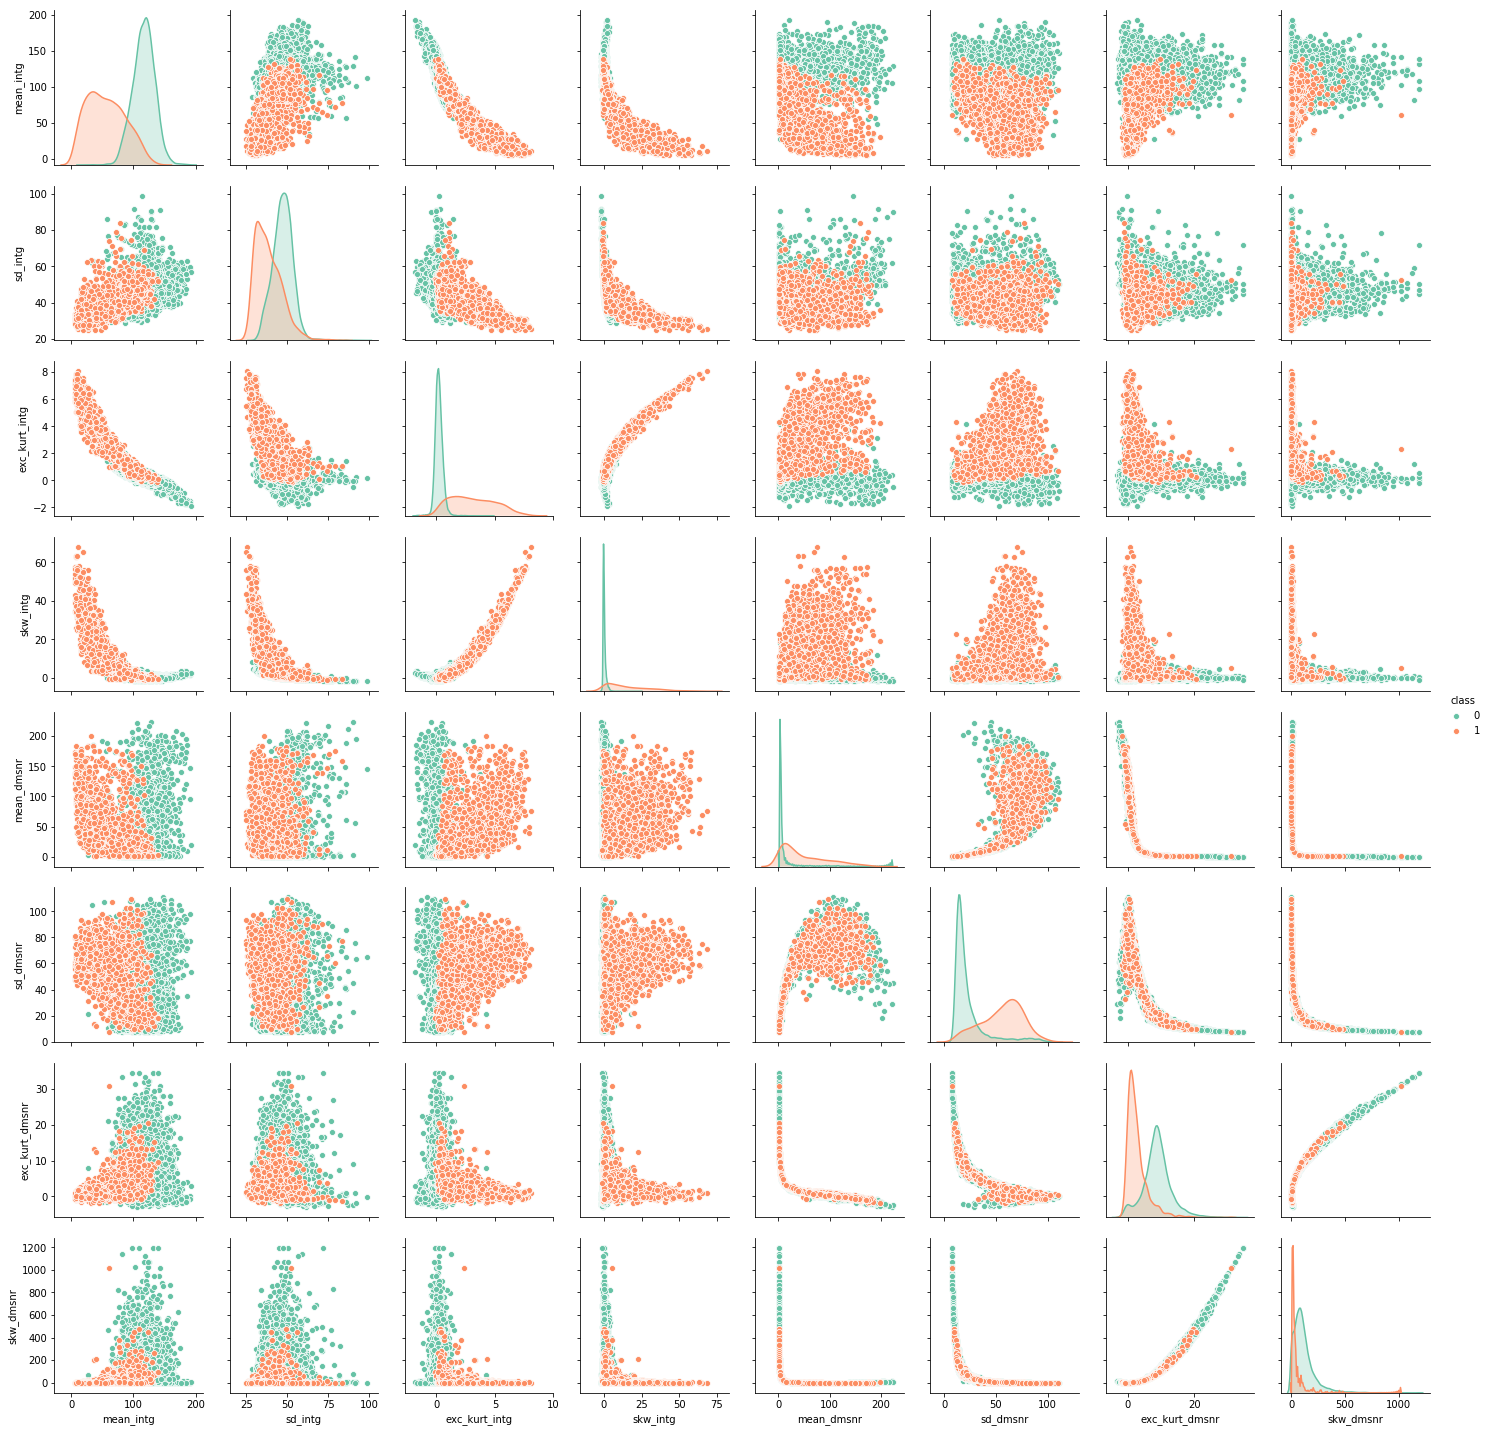

In [57]:
%time
sns.pairplot(data = pulsars_Df, vars=pulsars_Df.drop('class', axis = 1), hue='class')

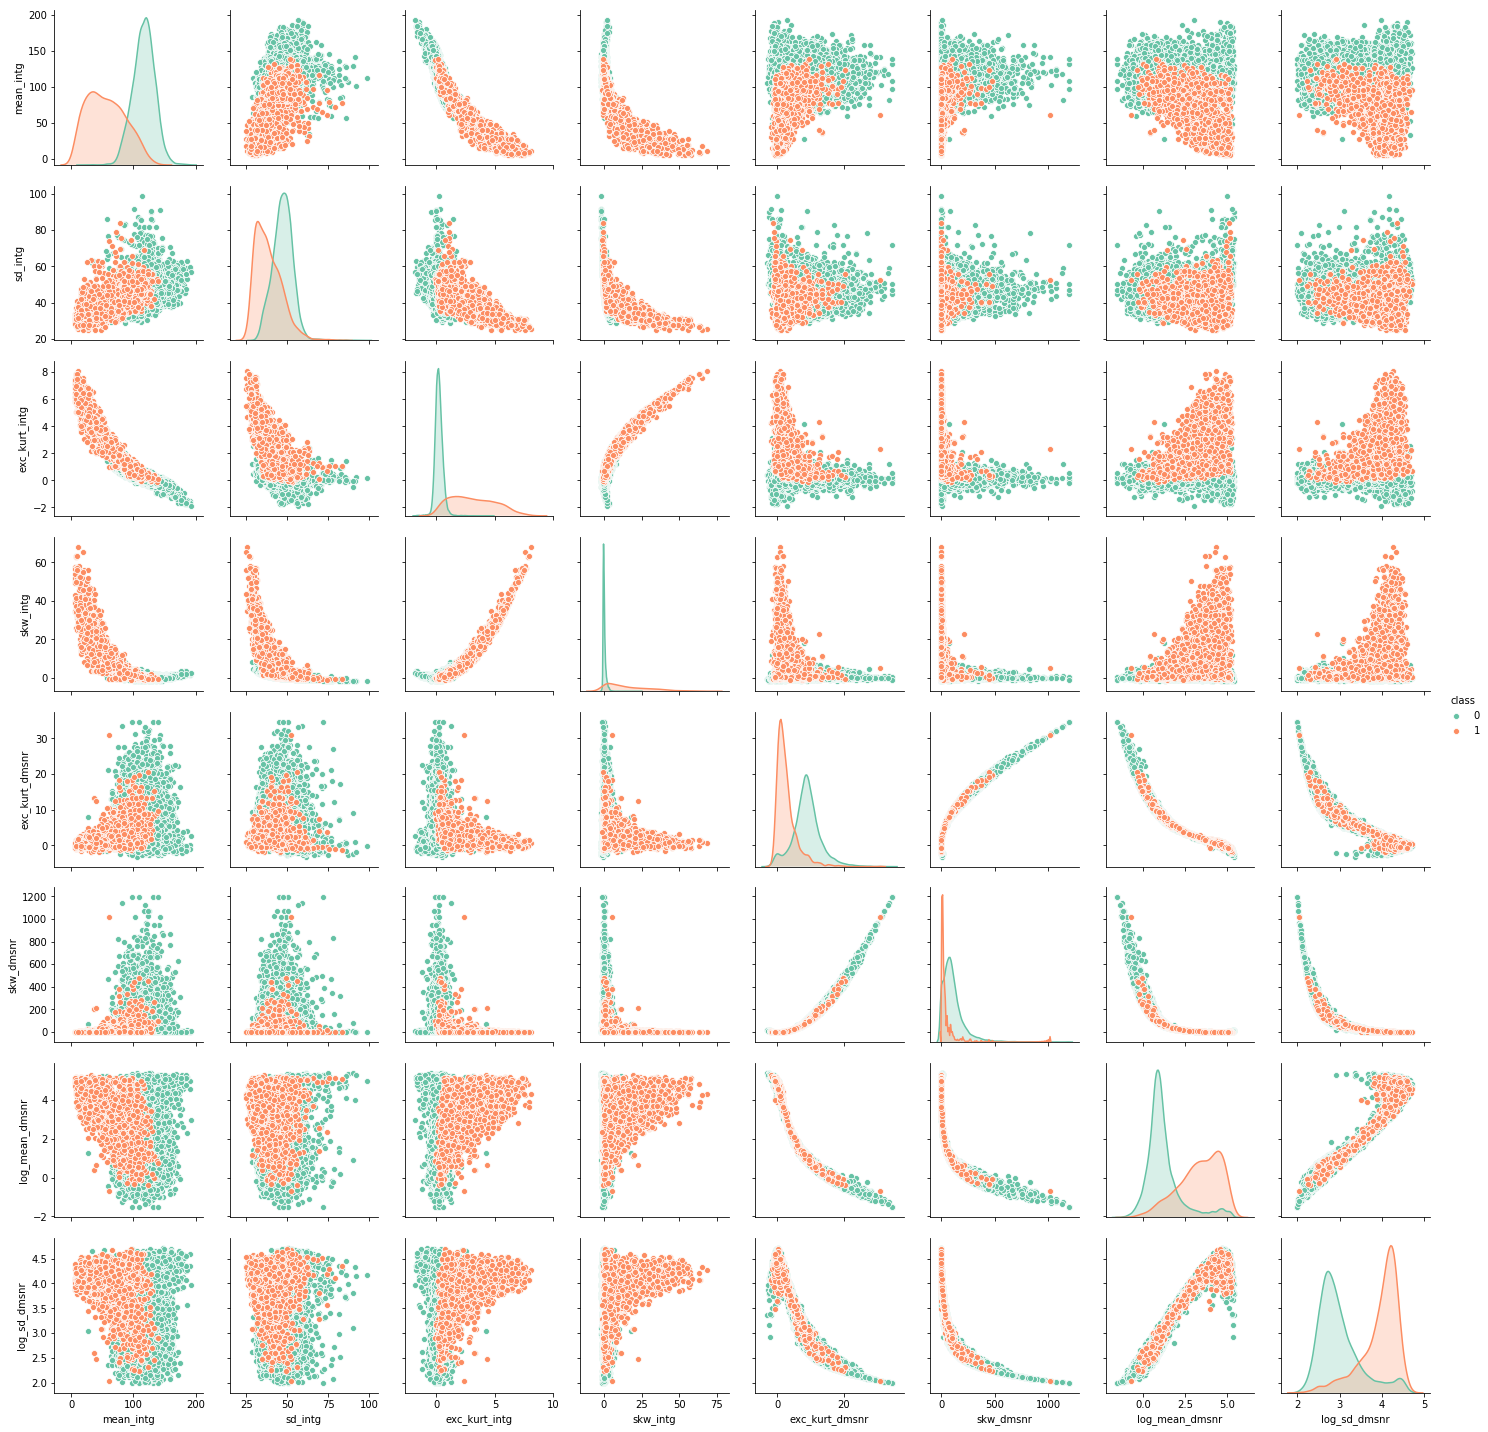

In [58]:
sns.pairplot(data = imputedPulsarDf, vars=imputedPulsarDf.drop('class', axis = 1), hue='class')

## Correlation Heat Map

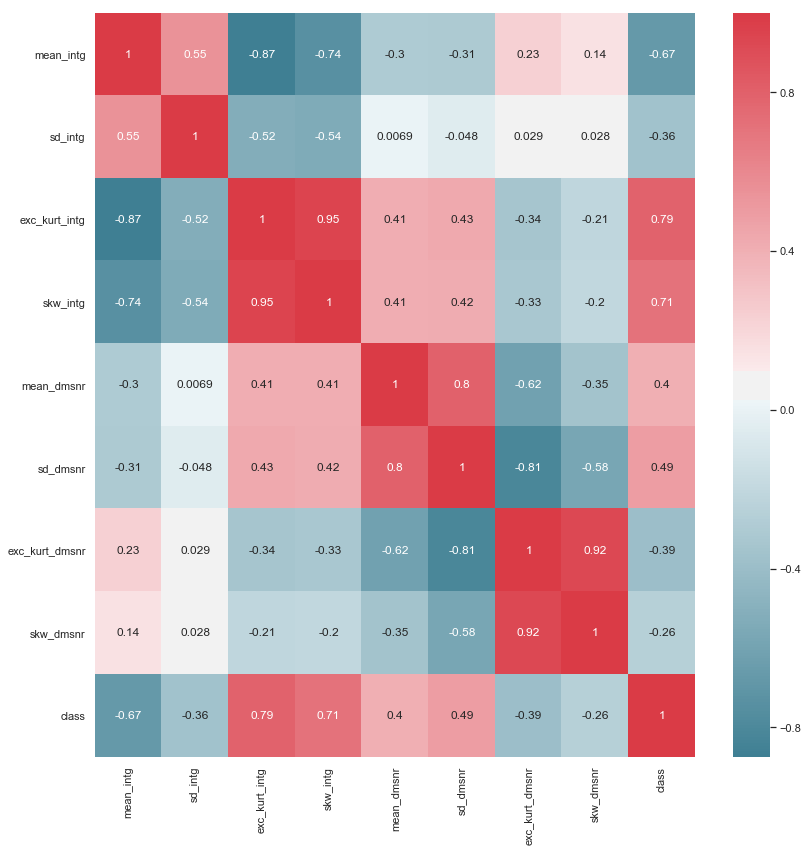

In [59]:
#Create heat map
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(pulsars_Df.corr(), cmap=sns.diverging_palette( 220 , 10 , as_cmap = True ), annot=True)
f.tight_layout()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Standardize and Scale the dataset

scaler = StandardScaler()
scaledPulsarData = scaler.fit(imputedPulsarDf.drop("class", axis =1)).transform(imputedPulsarDf.drop("class", axis =1))


In [61]:
# Perform PCA and plot Scree plot

# initially set n_compoments = no of features and later look at variance explained in Scree plot
# To choose number of PCA components 

pca = PCA(n_components=8)
X_pca = pca.fit(scaledPulsarData).transform(scaledPulsarData)
print(scaledPulsarData.shape)
print(X_pca.shape)

(17898, 8)
(17898, 8)


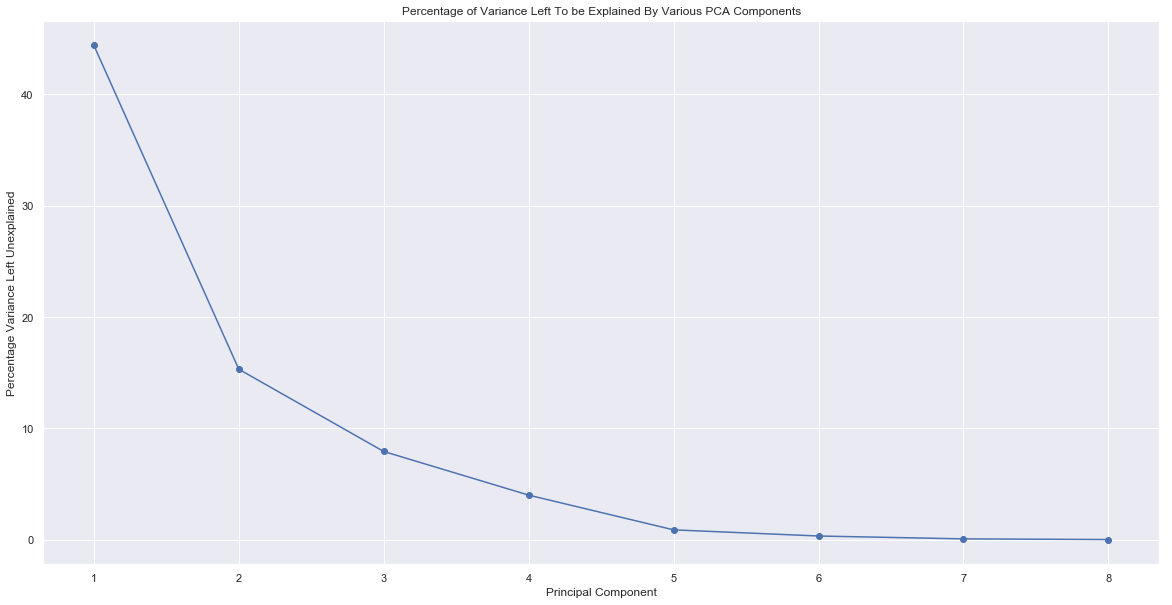

In [62]:
# Scree Plot
combinedVarExplained = []

for varExplained in list(pca.explained_variance_ratio_):
    if len(combinedVarExplained) != 0:
        combinedVarExplained.append(combinedVarExplained[-1] + varExplained)
    else:
        combinedVarExplained.append(varExplained)

unexplainedVarLeft = list((1 - np.array(combinedVarExplained)) * 100)
  
fig, axes = plt.subplots(1,1,figsize = (20,10))   
axes = plt.plot(range(1, 9), unexplainedVarLeft, '-o')
plt.title('Percentage of Variance Left To be Explained By Various PCA Components')
plt.ylabel('Percentage Variance Left Unexplained')
plt.xlabel('Principal Component')
plt.show()

In [63]:
###### Function Taken from Dr. Larsons Notebook ##############################

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, imputedPulsarDf.drop("class", axis =1).columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_pca["class"] = imputedPulsarDf["class"]


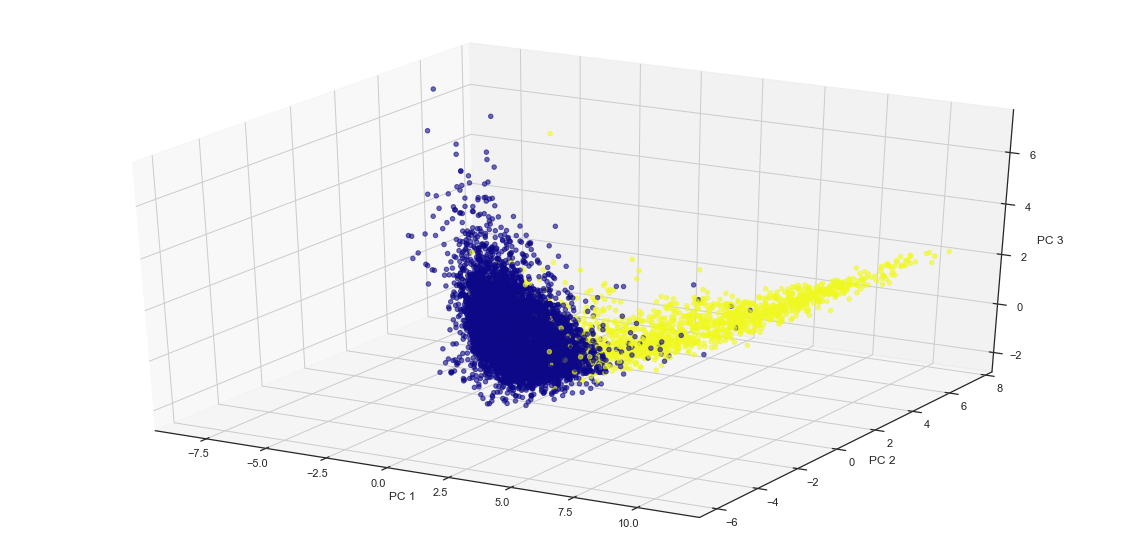

In [64]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], c=np.ndarray.flatten(df_pca['class'].values), cmap='plasma', alpha =0.6)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.grid()

plt.show()

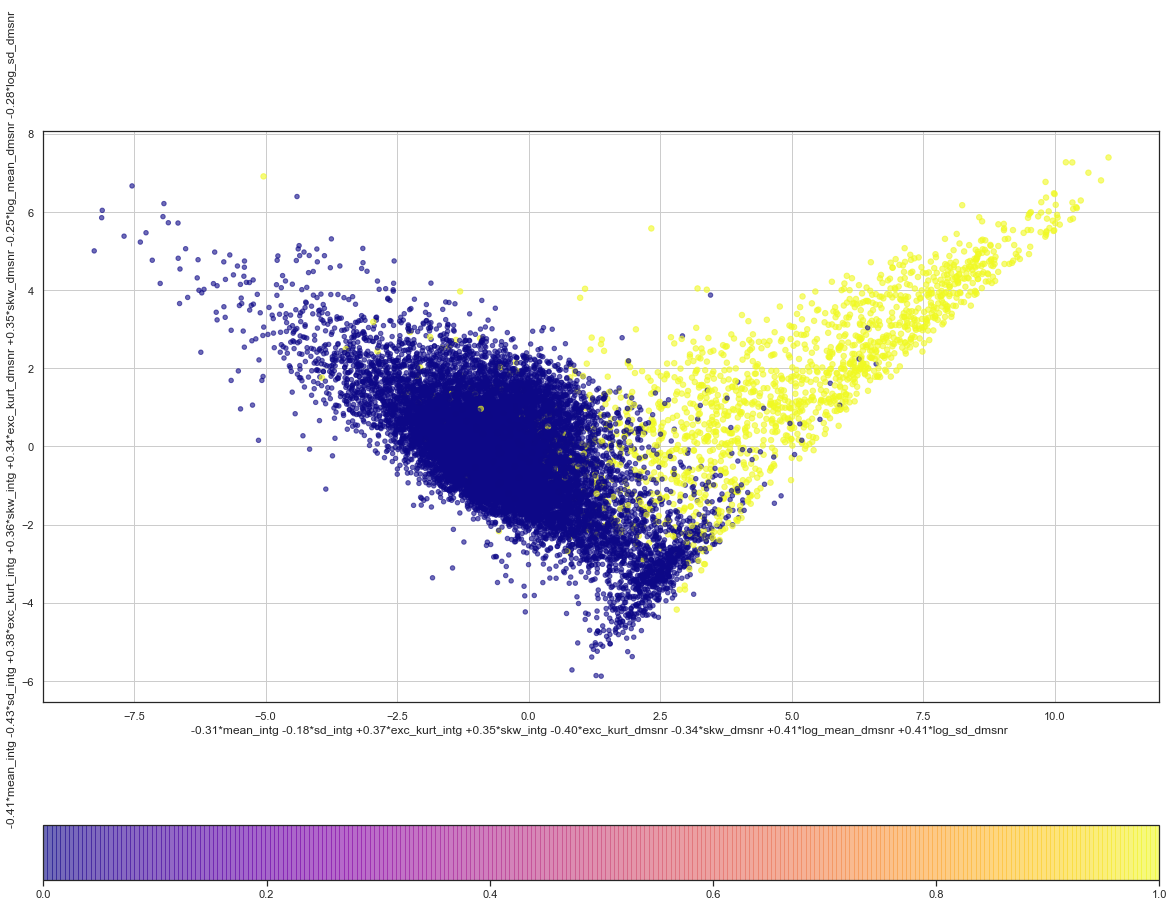

In [65]:
# Plot 2D Plot for first 2 Principal Components

plt.figure(figsize=(20,15))
sns.set(style="white")
plt.scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.6)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()
plt.colorbar(orientation = 'horizontal')

In [66]:
# Perform The LDA
lda = LDA(n_components=1)
X_lda = lda.fit(X = imputedPulsarDf.drop("class", axis =1), \
                y = imputedPulsarDf['class']).transform(imputedPulsarDf.drop("class", axis =1))
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, imputedPulsarDf.drop("class", axis =1).columns)
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])
df_lda["class"] = imputedPulsarDf["class"]

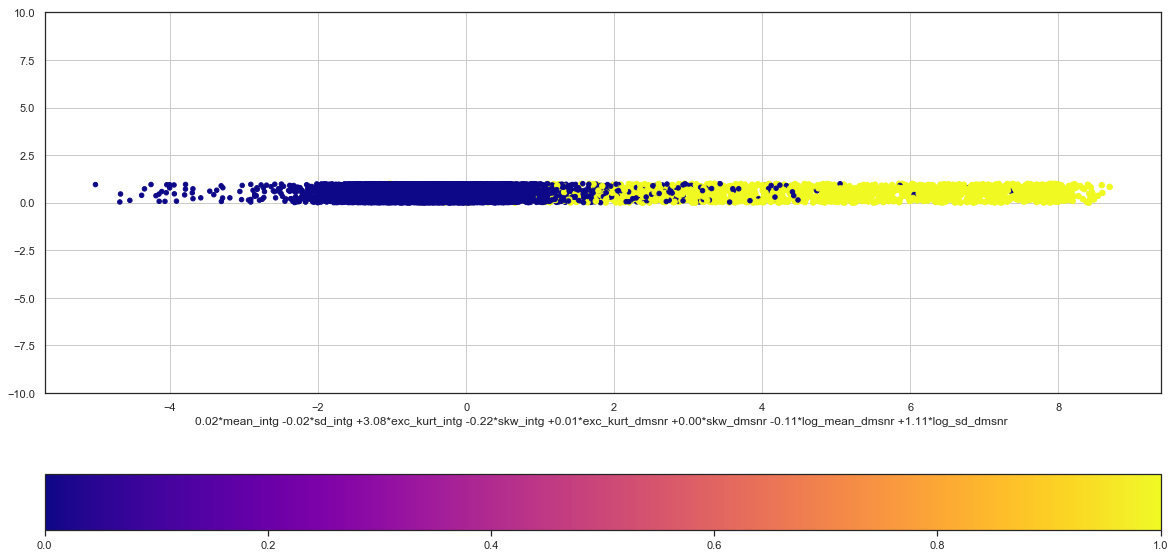

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(x = df_lda[lda_weight_strings[0]] , y = np.zeros(df_lda[lda_weight_strings[0]].shape[0]) + \
            np.random.rand(df_lda[lda_weight_strings[0]].shape[0]), \
            c = df_lda["class"], cmap ="plasma", s = (df_lda["class"] + 2)*10)
plt.xlabel(lda_weight_strings[0])
plt.ylim(-10,10)
plt.colorbar(orientation = 'horizontal')
plt.grid()

In [68]:
# Test K Means
from sklearn.cluster import KMeans
k = 5
X = X_pca[: , [0,1,2]]
kmeans = KMeans(n_clusters=k, random_state=999)
y_pred = kmeans.fit_predict(X)

In [69]:
y_pred

array([2, 2, 0, ..., 3, 2, 3], dtype=int32)

In [70]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=999)
    kmeans.fit_predict(X)
    silhouette_score_list.append(silhouette_score(X, kmeans.labels_))

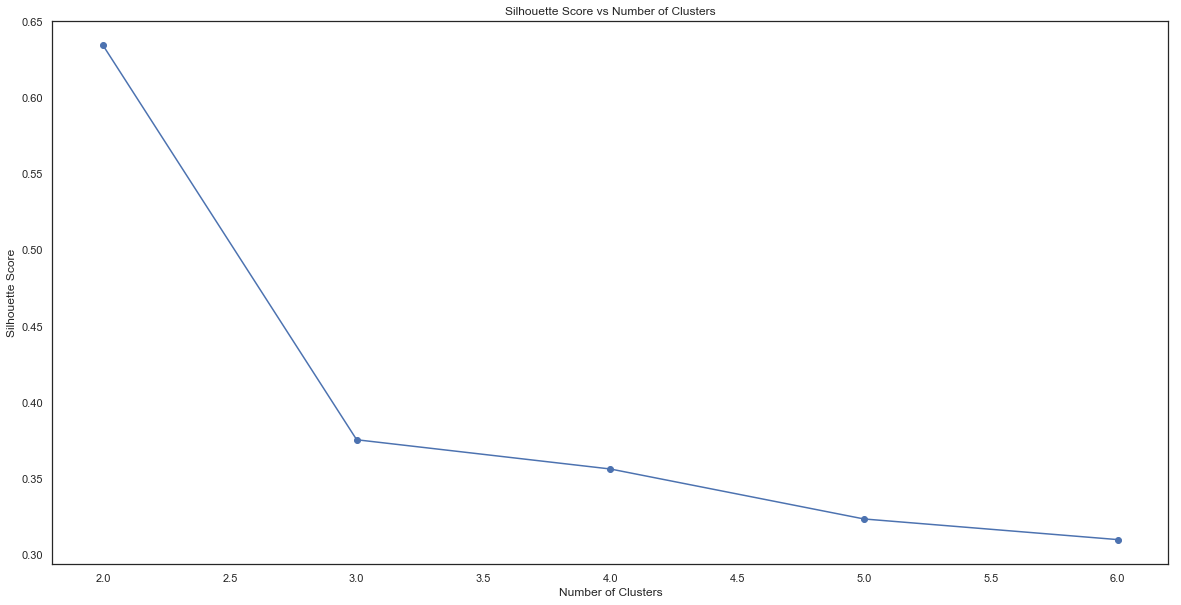

In [71]:
fig, axes = plt.subplots(1,1,figsize = (20,10))   
axes = plt.plot(range(2, 7), silhouette_score_list, '-o')
plt.title('Silhouette Score vs Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

In [72]:
# Now running with 2 clusters as identified by highest Silhouette Score and dataset domain knowledge
k = 2
kmeans = KMeans(n_clusters=k, random_state=999)
y_pred = kmeans.fit_predict(X)

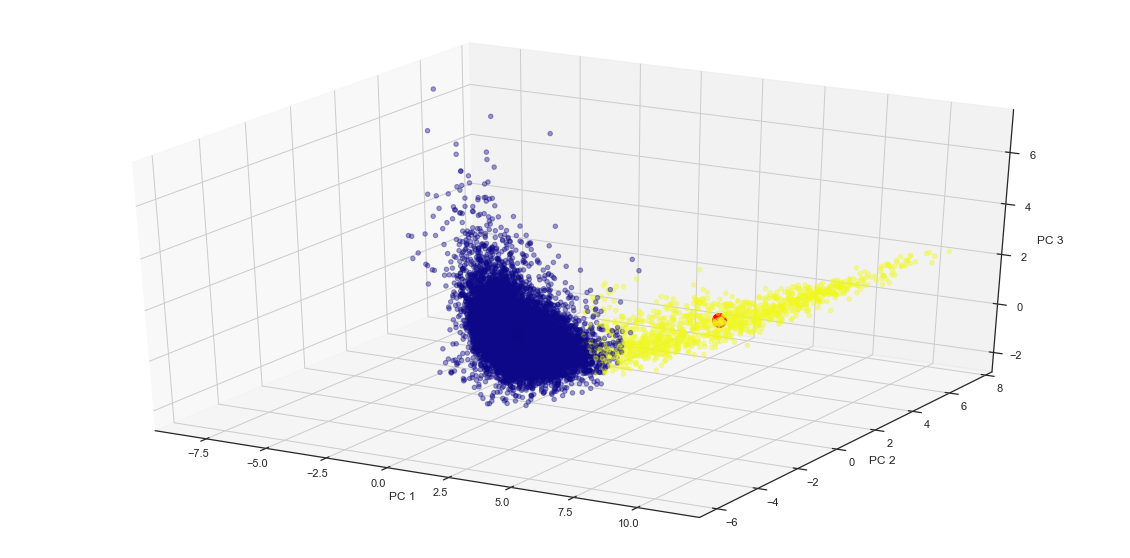

In [73]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[: , 0], X[: , 1], X[: , 2], c= (1- kmeans.labels_), cmap='plasma', alpha = 0.4)

for i,j,k in kmeans.cluster_centers_:
    ax.scatter(i,j,k,s=200,c='red',marker='o', alpha = 1)
    
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.grid()

plt.show()

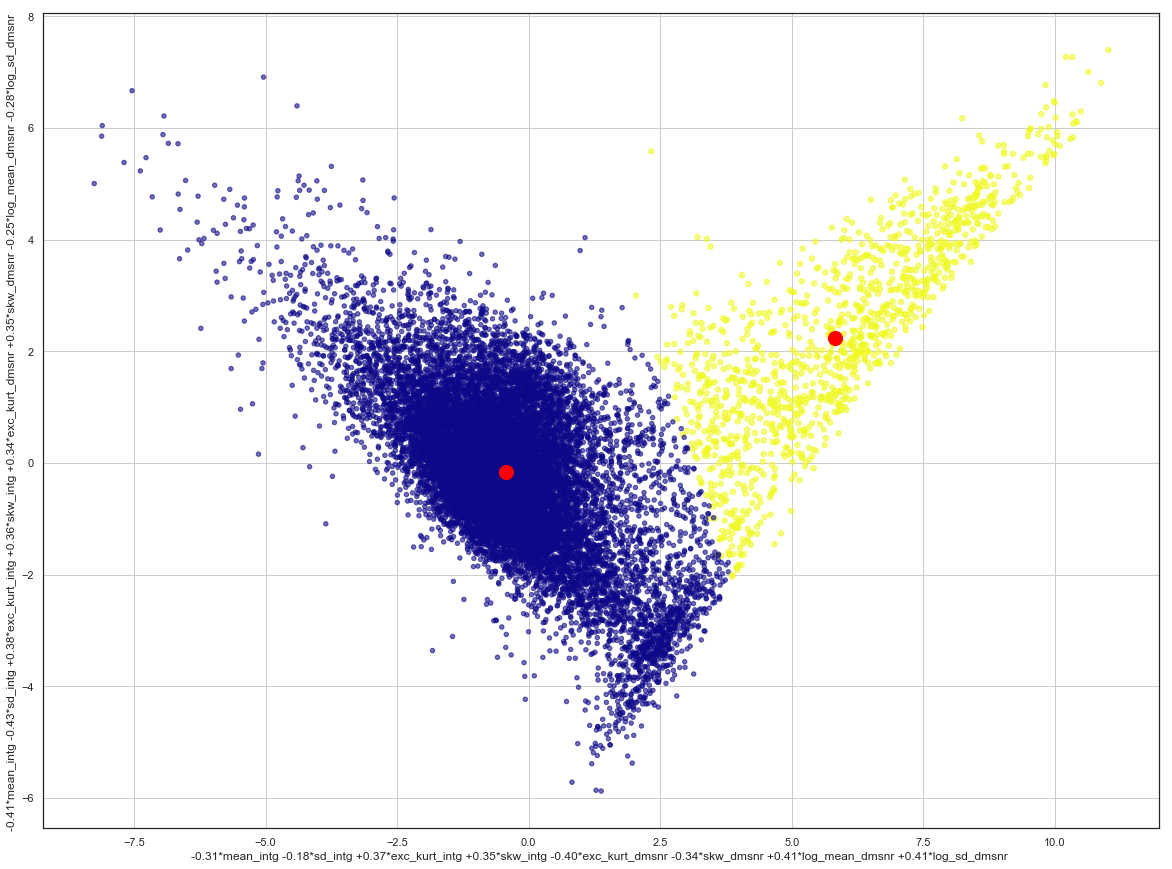

In [74]:
# Plot 2D Plot for first 2 Principal Components with cluster labels

plt.figure(figsize=(20,15))
sns.set(style="white")
plt.scatter(x = X[: , 0], y = X[: , 1] , \
            c = (1- kmeans.labels_) , cmap ="plasma", s = ((1- kmeans.labels_) + 2)*10, alpha =0.6)

for i,j,k in kmeans.cluster_centers_:
    plt.scatter(i,j,s=200,c='red',marker='o')
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()


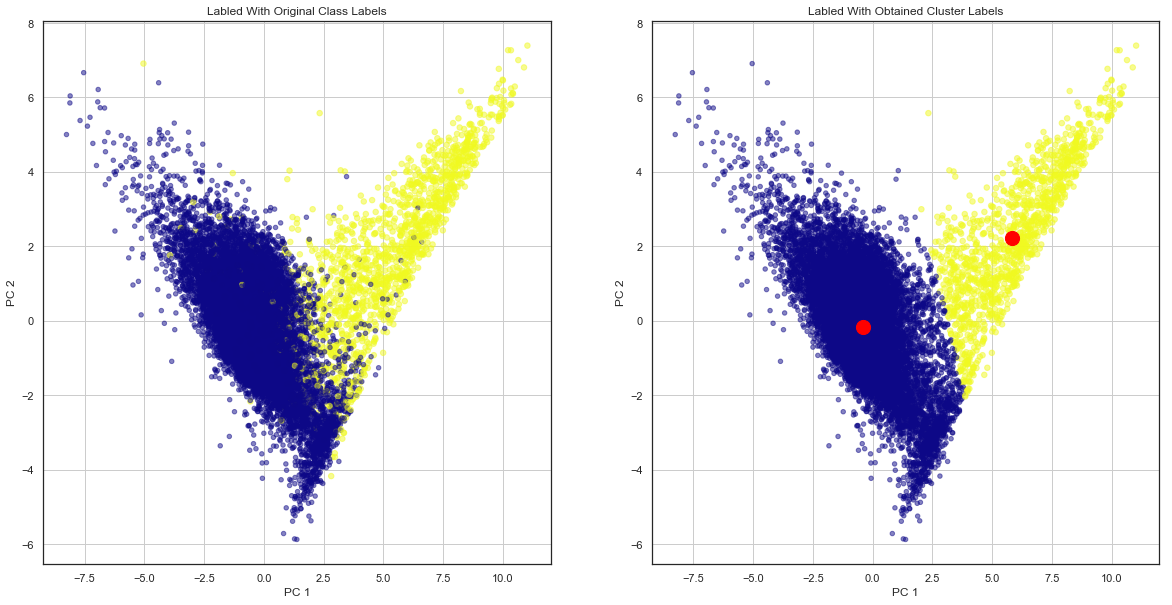

In [75]:
# Plotting 2d Graphs for Initial PCA with class label and PCA after Clustering graphs for visually inspecting
# clustering tendency in the data

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (1- kmeans.labels_) , cmap ="plasma", s = ((1- kmeans.labels_) + 2)*10, alpha = 0.5)

for i,j,k in kmeans.cluster_centers_:
    ax[1].scatter(i,j,s=200,c='red',marker='o')

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels")

ax[1].grid()


In [92]:
# Sample K-Means on Whole DataSet
k = 2
X = scaledPulsarData
kmeans = KMeans(n_clusters=k, random_state=999)
y_pred = kmeans.fit_predict(X)
silhouette_score(X, kmeans.labels_)

0.615609409394205

## Clustering in Pre Processing stage for Classification

In [77]:
### Seperate the class and predictor variables

X = scaledPulsarData
y = imputedPulsarDf['class'].values

In [81]:
## Since we have class imbalance, create a stratified Shuffle 80/20 split CV object
from sklearn.model_selection import StratifiedShuffleSplit

num_cv_iterations = 10
stratified_cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=999)
                         
print(stratified_cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=999, test_size=0.2,
            train_size=None)


In [89]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

clf = SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999, class_weight="balanced")

scores = cross_validate(clf, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

fit_time  score_time  test_F1_Score  train_F1_Score  test_AUC  train_AUC  \
0  1.809798    0.805076       0.860399        0.874047  0.970675   0.977259   
1  1.780844    0.835529       0.879643        0.872635  0.974503   0.975718   
2  1.793015    0.826171       0.876437        0.865779  0.969561   0.978370   
3  1.742031    0.824007       0.872781        0.870537  0.968482   0.976642   
4  1.849675    0.831248       0.883652        0.864962  0.971997   0.975363   
5  1.825403    0.804354       0.845390        0.869848  0.968076   0.976502   
6  1.856255    0.779631       0.868035        0.872317  0.977644   0.974857   
7  1.933532    0.807292       0.888567        0.864162  0.978062   0.975351   
8  1.876782    0.764905       0.875184        0.867435  0.975714   0.974634   
9  1.875694    0.799580       0.878613        0.862379  0.971832   0.976586   

   test_Accuracy  train_Accuracy  test_Precision  train_Precision  \
0       0.972626        0.975765        0.807487         0.833795   
1       0.977374        0.975555        0.857971         0.834377   
2       0.975978        0.973949        0.828804         0.819482   
3       0.975978        0.974927        0.847701         0.825581   
4       0.977933        0.973809        0.854701         0.819236   
5       0.969553        0.974857        0.790451         0.826804   
6       0.974860        0.975485        0.836158         0.833797   
7       0.978492        0.973739        0.845730         0.820865   
8       0.976257        0.974298        0.844193         0.821843   
9       0.976536        0.973250        0.835165         0.815217   

   test_Recall  train_Recall  
0     0.920732      0.918383  
1     0.902439      0.914569  
2     0.929878      0.917620  
3     0.899390      0.920671  
4     0.914634      0.916095  
5     0.908537      0.917620  
6     0.902439      0.914569  
7     0.935976      0.912281  
8     0.908537      0.918383  
9     0.926829      0.915332


 Mean values for Performance Metrices on Train Set are .......


train_F1_Score  train_AUC  train_Accuracy  train_Precision  train_Recall
0         0.86841   0.976128        0.974563           0.8251      0.916552


 Mean values for Performance Metrices on Test Set are .......


test_F1_Score  test_AUC  test_Accuracy  test_Precision  test_Recall
0        0.87287  0.972655       0.975559        0.834836     0.914939

In [95]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=20)),
    ("svm", SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999, class_weight="balanced")),
])

scores = cross_validate(pipeline, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

fit_time  score_time  test_F1_Score  train_F1_Score  test_AUC  train_AUC  \
0   9.920320    1.411912       0.831711        0.845690  0.963629   0.970212   
1   9.395420    1.526503       0.827195        0.843186  0.962140   0.971131   
2  10.585101    1.455972       0.848315        0.839559  0.968422   0.970701   
3  10.614393    1.429139       0.855474        0.841584  0.962519   0.971246   
4  10.105501    1.549856       0.848227        0.843906  0.966768   0.968640   
5   9.927603    1.510832       0.832402        0.840283  0.956349   0.971555   
6   9.813588    1.444737       0.833570        0.841658  0.962333   0.967954   
7   9.303208    1.678307       0.861582        0.834512  0.970473   0.969387   
8  10.059679    1.517986       0.836620        0.841584  0.969115   0.968637   
9   9.204226    1.649149       0.842999        0.833450  0.968566   0.969278   

   test_Accuracy  train_Accuracy  test_Precision  train_Precision  \
0       0.966201        0.969619        0.764706         0.790451   
1       0.965922        0.969060        0.772487         0.786658   
2       0.969832        0.968501        0.786458         0.786667   
3       0.972346        0.968711        0.820728         0.784443   
4       0.970112        0.969409        0.793103         0.791973   
5       0.966480        0.968431        0.768041         0.782752   
6       0.967318        0.968781        0.781333         0.785714   
7       0.972626        0.967314        0.802632         0.777851   
8       0.967598        0.968711        0.777487         0.784443   
9       0.968994        0.966895        0.786280         0.772638   

   test_Recall  train_Recall  
0     0.911585      0.909230  
1     0.890244      0.908467  
2     0.920732      0.900076  
3     0.893293      0.907704  
4     0.911585      0.903127  
5     0.908537      0.906941  
6     0.893293      0.906178  
7     0.929878      0.900076  
8     0.905488      0.907704  
9     0.908537      0.904653


 Mean values for Performance Metrices on Train Set are .......


train_F1_Score  train_AUC  train_Accuracy  train_Precision  train_Recall
0        0.840541   0.969874        0.968543         0.784359      0.905416


 Mean values for Performance Metrices on Test Set are .......


test_F1_Score  test_AUC  test_Accuracy  test_Precision  test_Recall
0        0.84181  0.965031       0.968743        0.785326     0.907317

In [97]:
## Running Grid Search to find number of clusters
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))

grid = GridSearchCV(pipeline, \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=5, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.0s


KeyboardInterrupt: 